## DATA ANALYSIS

16th March

The goal of this notebook is creating a CNN to analyse previously produced data.

### Packages

In [50]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras import initializers, regularizers
from tensorflow.keras import optimizers
from keras.utils.layer_utils import count_params
from tensorflow.keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV


## DATA renormalization

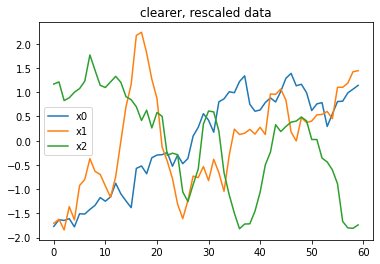

[1. 0. 0.]
10000 8000 2000 60


In [2]:
str0 = 'ts_L60_Z12_A500_DX50_bias5_N10000'
fnamex = 'DATA/x_'+str0+'.csv'
fnamey = 'DATA/y_'+str0+'.csv'

x = np.loadtxt(fnamex, delimiter = ',', dtype = float)
N = len(x)

xm = x.mean(axis = 1)
stdx = x.std(axis = 1)
for n in range(N):
    x[n] -= xm[n]
    x[n] /= stdx[n]
    
plt.plot(x[0], label='x0')
plt.plot(x[1], label='x1')
plt.plot(x[2], label='x2')
plt.title('clearer, rescaled data')
plt.legend()
plt.show()    


categ = np.loadtxt(fnamey, delimiter = ',', dtype = int)
N_categ = np.max(categ)+1
y = np.zeros((N,N_categ))
for n in range(N):
    y[n][categ[n]] = 1             #one-hot encoding
print(y[0])


perc_train = 0.8                    
N_train = int(N*perc_train)
N_val = N - N_train

x_train, y_train = x[:N_train], y[:N_train]
x_val, y_val = x[N_train:], y[N_train:]

L = len(x[0])
print(N,N_train, N_val,L)


x_train = x_train.reshape(x_train.shape[0],L,1)    #reshaping
x_val = x_val.reshape(x_val.shape[0],L,1)
input_shape = (L,1)

In [3]:
reg = regularizers.l2(0.01)    #LASSO, lambda = 10e-4
np.random.seed(12345)
ini = initializers.RandomNormal(mean = 0, stddev = 0.05)

model = Sequential()
model.add(Conv1D(                                       #First layer:
                filters = 5,
                kernel_size = 11,                       #like Z = 12
                kernel_regularizer = reg,
                kernel_initializer = ini,
                activation = 'relu',
                input_shape = input_shape
                ))
model.add(AveragePooling1D(5))                          #Reduce 5 -> 1

model.add(Conv1D(                                       #Second layer
                filters = 5,
                kernel_size = 7,
                activation = 'relu'
                ))
model.add(Flatten())                                      #Move to GNN
model.add(Dense(10,activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(N_categ,activation = 'softmax'))

print(model.summary())   #Notice how few parameters!

NameError: name 'input_shape' is not defined

In [4]:

opt = optimizers.SGD(lr = 0.01, momentum = 0.9, nesterov = True, decay = 1e-6)

model.compile(loss = tensorflow.keras.losses.categorical_crossentropy,
              optimizer = 'adam', metrics = ['accuracy'])

#after a compilation of the network we save in 'initial.h5' the weight at the beginning
model.save_weights('initial.h5')

In [5]:
batch_size = 250
epochs = 100
fit = model.fit(x_train,
                y_train,
                batch_size=batch_size,
                epochs=epochs,
                validation_data = (x_val,y_val),
                verbose = 2
               )

Epoch 1/100
32/32 - 7s - loss: 1.1038 - accuracy: 0.3298 - val_loss: 1.0968 - val_accuracy: 0.3735
Epoch 2/100
32/32 - 0s - loss: 1.0956 - accuracy: 0.3643 - val_loss: 1.0907 - val_accuracy: 0.4050
Epoch 3/100
32/32 - 0s - loss: 1.0899 - accuracy: 0.3868 - val_loss: 1.0820 - val_accuracy: 0.4130
Epoch 4/100
32/32 - 0s - loss: 1.0801 - accuracy: 0.4135 - val_loss: 1.0668 - val_accuracy: 0.4515
Epoch 5/100
32/32 - 1s - loss: 1.0684 - accuracy: 0.4224 - val_loss: 1.0491 - val_accuracy: 0.4700
Epoch 6/100
32/32 - 0s - loss: 1.0502 - accuracy: 0.4466 - val_loss: 1.0271 - val_accuracy: 0.4885
Epoch 7/100
32/32 - 0s - loss: 1.0329 - accuracy: 0.4596 - val_loss: 1.0055 - val_accuracy: 0.5090
Epoch 8/100
32/32 - 0s - loss: 1.0119 - accuracy: 0.4863 - val_loss: 0.9800 - val_accuracy: 0.5280
Epoch 9/100
32/32 - 0s - loss: 0.9902 - accuracy: 0.4976 - val_loss: 0.9534 - val_accuracy: 0.5450
Epoch 10/100
32/32 - 0s - loss: 0.9681 - accuracy: 0.5182 - val_loss: 0.9344 - val_accuracy: 0.5590
Epoch 11/

32/32 - 0s - loss: 0.6339 - accuracy: 0.7477 - val_loss: 0.6198 - val_accuracy: 0.7545
Epoch 84/100
32/32 - 0s - loss: 0.6281 - accuracy: 0.7484 - val_loss: 0.6203 - val_accuracy: 0.7555
Epoch 85/100
32/32 - 0s - loss: 0.6250 - accuracy: 0.7517 - val_loss: 0.6133 - val_accuracy: 0.7595
Epoch 86/100
32/32 - 0s - loss: 0.6237 - accuracy: 0.7549 - val_loss: 0.6114 - val_accuracy: 0.7625
Epoch 87/100
32/32 - 0s - loss: 0.6173 - accuracy: 0.7575 - val_loss: 0.6142 - val_accuracy: 0.7635
Epoch 88/100
32/32 - 0s - loss: 0.6189 - accuracy: 0.7544 - val_loss: 0.6183 - val_accuracy: 0.7590
Epoch 89/100
32/32 - 0s - loss: 0.6220 - accuracy: 0.7536 - val_loss: 0.6053 - val_accuracy: 0.7615
Epoch 90/100
32/32 - 0s - loss: 0.6164 - accuracy: 0.7594 - val_loss: 0.6026 - val_accuracy: 0.7640
Epoch 91/100
32/32 - 0s - loss: 0.6102 - accuracy: 0.7638 - val_loss: 0.5973 - val_accuracy: 0.7620
Epoch 92/100
32/32 - 0s - loss: 0.6031 - accuracy: 0.7640 - val_loss: 0.5971 - val_accuracy: 0.7635
Epoch 93/100


As we can see now the performance are really better!

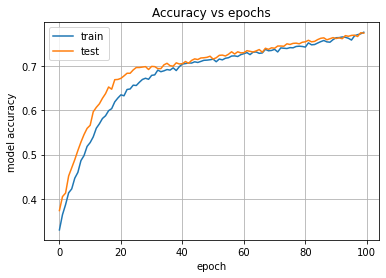

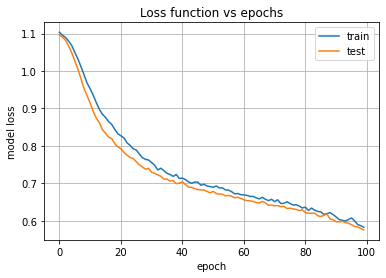

In [6]:
#Plot

# accuracy
plt.plot(fit.history['accuracy'])
plt.plot(fit.history['val_accuracy'])
plt.title('Accuracy vs epochs')
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.grid()
plt.show()
# loss
plt.plot(fit.history['loss'])
plt.plot(fit.history['val_loss'])
plt.title('Loss function vs epochs')
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.grid()
plt.show()

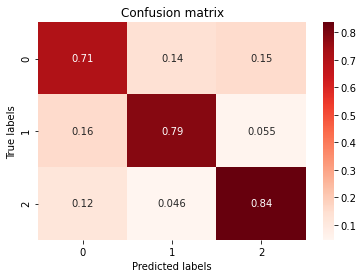

In [7]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

y_pred_val  = model.predict(x_val)
#take the class with the highest probability from the val predictions
max_y_pred_val = np.argmax(y_pred_val, axis=1)
max_y_val = np.argmax(y_val, axis=1)
confusion_Oz = confusion_matrix(max_y_pred_val,max_y_val, normalize='true') 
sns.heatmap(confusion_Oz, annot = True, cmap = plt.cm.Reds, fmt = '.2g')

plt.ylabel('True labels')
plt.xlabel('Predicted labels')
plt.title('Confusion matrix')
plt.show()

100%|██████████| 12/12 [10:07<00:00, 50.59s/it]


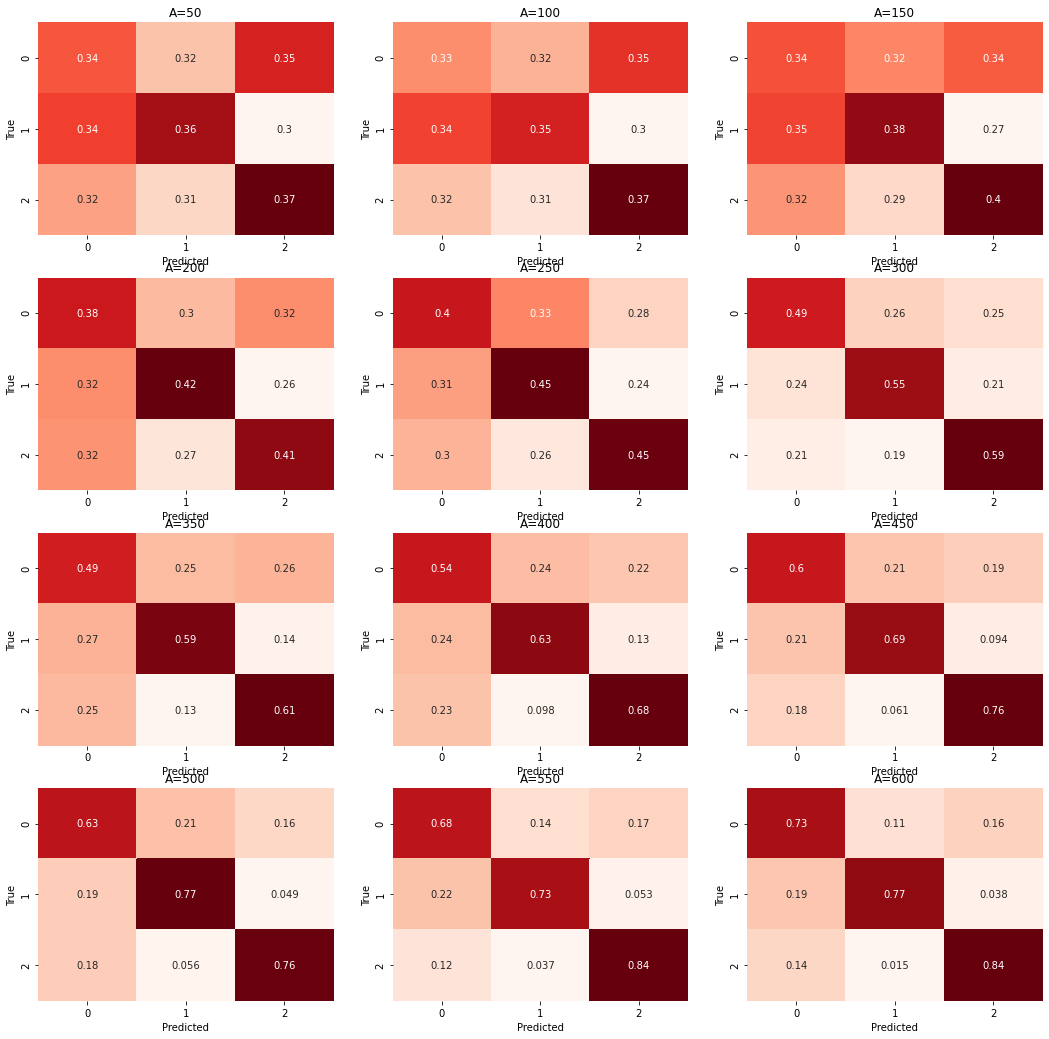

{50: 0.35620625168085096, 100: 0.37803750187158586, 150: 0.3885500028729439, 200: 0.4023687466979027, 250: 0.42791875153779985, 300: 0.526406255364418, 350: 0.5503062516450882, 400: 0.6065437525510788, 450: 0.6663062512874603, 500: 0.7041874945163726, 550: 0.7339374989271163, 600: 0.777581250667572}


In [8]:
from tqdm import tqdm

fig, ax = plt.subplots(4, 3, figsize=(18,18))
As = np.arange(50,650,50)
scores = {}

for a in tqdm(range(len((As)))):
    
    #if statements to define the grid for the subplots
    if a < 3:
        i = 0
        j = a
    elif a < 6:
        i = 1
        j = a-3
    elif a < 9:
        i = 2
        j = a-6
    elif a < 12:
        i = 3
        j = a-9
    elif a < 15:
        i = 4
        j = a-12
    
    str0 = f'ts_L60_Z12_A{As[a]}_DX50_bias5_N10000'
    fnamex = 'DATA/x_'+str0+'.csv'
    fnamey = 'DATA/y_'+str0+'.csv'
    
    x = np.loadtxt(fnamex, delimiter = ',', dtype = float)
    N = len(x)

    xm = x.mean(axis = 1)
    stdx = x.std(axis = 1)
    for n in range(N):
        x[n] -= xm[n]
        x[n] /= stdx[n]

    categ = np.loadtxt(fnamey, delimiter = ',', dtype = int)
    N_categ = np.max(categ)+1
    y = np.zeros((N,N_categ))
    for n in range(N):
        y[n][categ[n]] = 1             

    perc_train = 0.8                    
    N_train = int(N*perc_train)
    N_val = N - N_train

    x_train, y_train = x[:N_train], y[:N_train]
    x_val, y_val = x[N_train:], y[N_train:]

    L = len(x[0])

    x_train = x_train.reshape(x_train.shape[0],L,1)   
    x_val = x_val.reshape(x_val.shape[0],L,1)
    input_shape = (L,1)
    
    #at each step of the for loop we recover the initial weights in order to start always from the same model
    model.load_weights('initial.h5')
    fit = model.fit(x_train,
                    y_train,
                    batch_size = batch_size,
                    epochs = epochs, 
                    validation_data = (x_val,y_val),
                    verbose = 0
                   )
    scores[As[a]] = np.mean(fit.history['accuracy'][-20:])
    
    y_pred_val  = model.predict(x_val)
    max_y_pred_val = np.argmax(y_pred_val, axis=1)
    max_y_val = np.argmax(y_val, axis=1)
    confusion_Oz = confusion_matrix(max_y_pred_val,max_y_val, normalize='true') 
 
    g = sns.heatmap(confusion_Oz,
                    annot = True,
                    cmap = plt.cm.Reds,
                    cbar = False,
                    fmt = '.2g',
                    ax = ax[i][j]
                   )
    g.set_ylabel('True')
    g.set_xlabel('Predicted')
    g.set_title(f'A={As[a]}')

plt.show()

In [58]:
keys_int = []
as_accuracy = []
for k in scores.keys():
    keys_int.append(k)
    as_accuracy.append(scores.get(k))
plt.title('Accuracy vs Signal Amplitude')
plt.xlabel('Signal Amplitude [a.u.]')
plt.xlabel('Accuracy [a.u.]')
plt.plot(keys_int, as_accuracy, '-o')
plt.grid()
plt.show()

NameError: name 'scores' is not defined

# new data

In [2]:
str1 = 'ts_comp_N10000'
fnamex1 = 'DATA/x_'+str1+'.csv'
fnamey1 = 'DATA/y_'+str1+'.csv'

x = np.loadtxt(fnamex1, delimiter = ',', dtype = float)
categ = np.loadtxt(fnamey1, delimiter = ',', dtype = int)

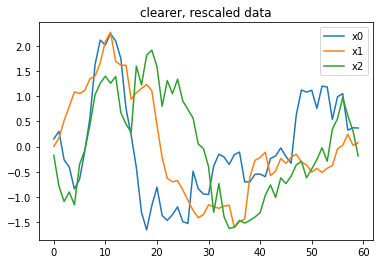

[0. 1. 0.]
Total samples:  10000 
Training samples: 8000 2000 
Test samples: 60


In [3]:
N = len(x)

xm = x.mean(axis = 1)
stdx = x.std(axis = 1)
for n in range(N):
    x[n] -= xm[n]
    x[n] /= stdx[n]
    
plt.plot(x[0], label='x0')
plt.plot(x[1], label='x1')
plt.plot(x[2], label='x2')
plt.title('clearer, rescaled data')
plt.legend()
plt.show()    

N_categ = np.max(categ)+1
y = np.zeros((N,N_categ))
for n in range(N):
    y[n][categ[n]] = 1             #one-hot encoding
print(y[0])


perc_train = 0.8                    
N_train = int(N*perc_train)
N_val = N - N_train

x_train, y_train = x[:N_train], y[:N_train]
x_val, y_val = x[N_train:], y[N_train:]

L = len(x[0])
print('Total samples: ', N, '\nTraining samples:',N_train, N_val, '\nTest samples:',L)


x_train = x_train.reshape(x_train.shape[0],L,1)    #reshaping
x_val = x_val.reshape(x_val.shape[0],L,1)
input_shape = (L,1)


### keeping just one Conv1d, adding dense

In [4]:
reg = regularizers.l2(0.01)    #LASSO, lambda = 10e-4
np.random.seed(12345)
ini = initializers.RandomNormal(mean = 0, stddev = 0.05)

batch_size = 250
epochs = 250

In [5]:
model1 = Sequential()
model1.add(Conv1D(                                       #First layer:
                filters = 5,
                kernel_size = 11,                       #like Z = 12
                kernel_regularizer = reg,
                kernel_initializer = ini,
                activation = 'relu',
                input_shape = input_shape
                ))
model1.add(AveragePooling1D(10))                          #Reduce 5 -> 1
model1.add(Flatten())                                     #Move to GNN

model1.add(Dense(9,activation = 'relu'))

model1.add(Dropout(0.1))
model1.add(Dense(N_categ,activation = 'softmax'))

print(model1.summary()) 
model1.compile(loss = tensorflow.keras.losses.categorical_crossentropy,
              optimizer = 'adam', metrics = ['accuracy'])

trainable_count1 = count_params(model.trainable_weights)

fit1 = model1.fit(x_train,
                y_train,
                batch_size=batch_size,
                epochs=epochs,
                validation_data = (x_val,y_val),
                verbose = 0
               )

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 50, 5)             60        
_________________________________________________________________
average_pooling1d (AveragePo (None, 5, 5)              0         
_________________________________________________________________
flatten (Flatten)            (None, 25)                0         
_________________________________________________________________
dense (Dense)                (None, 9)                 234       
_________________________________________________________________
dropout (Dropout)            (None, 9)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 30        
Total params: 324
Trainable params: 324
Non-trainable params: 0
__________________________________________________________

In [6]:
model2 = Sequential()
model2.add(Conv1D(                                       #First layer:
                filters = 5,
                kernel_size = 11,                       #like Z = 12
                kernel_regularizer = reg,
                kernel_initializer = ini,
                activation = 'relu',
                input_shape = input_shape
                ))
model2.add(AveragePooling1D(10))                          #Reduce 5 -> 1
model2.add(Flatten())                                     #Move to GNN
model2.add(Dense(9,activation = 'relu'))
model2.add(Dense(6,activation = 'relu'))
model2.add(Dropout(0.1))
model2.add(Dense(N_categ,activation = 'softmax'))

print(model2.summary()) 
model2.compile(loss = tensorflow.keras.losses.categorical_crossentropy,
              optimizer = 'adam', metrics = ['accuracy'])

trainable_count2 = count_params(model.trainable_weights)

fit2 = model2.fit(x_train,
                y_train,
                batch_size=batch_size,
                epochs=epochs,
                validation_data = (x_val,y_val),
                verbose = 0
               )

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 50, 5)             60        
_________________________________________________________________
average_pooling1d_1 (Average (None, 5, 5)              0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 25)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 9)                 234       
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 60        
_________________________________________________________________
dropout_1 (Dropout)          (None, 6)                 0         
_________________________________________________________________
dense_4 (Dense)              (None, 3)                

In [7]:
model3 = Sequential()
model3.add(Conv1D(                                       #First layer:
                filters = 5,
                kernel_size = 11,                       #like Z = 12
                kernel_regularizer = reg,
                kernel_initializer = ini,
                activation = 'relu',
                input_shape = input_shape
                ))
model3.add(AveragePooling1D(10))                          #Reduce 5 -> 1
model3.add(Flatten())                                     #Move to GNN
model3.add(Dense(9,activation = 'relu'))
model3.add(Dense(6,activation = 'relu'))
model3.add(Dense(3,activation = 'relu'))
model3.add(Dropout(0.1))
model3.add(Dense(N_categ,activation = 'softmax'))

print(model3.summary()) 

model3.compile(loss = tensorflow.keras.losses.categorical_crossentropy,
              optimizer = 'adam', metrics = ['accuracy'])

trainable_count3 = count_params(model.trainable_weights)

fit3 = model3.fit(x_train,
                y_train,
                batch_size=batch_size,
                epochs=epochs,
                validation_data = (x_val,y_val),
                verbose = 0
               )

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 50, 5)             60        
_________________________________________________________________
average_pooling1d_2 (Average (None, 5, 5)              0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 25)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 9)                 234       
_________________________________________________________________
dense_6 (Dense)              (None, 6)                 60        
_________________________________________________________________
dense_7 (Dense)              (None, 3)                 21        
_________________________________________________________________
dropout_2 (Dropout)          (None, 3)                

In [8]:
model4 = Sequential()
model4.add(Conv1D(                                       #First layer:
                filters = 5,
                kernel_size = 11,                       #like Z = 12
                kernel_regularizer = reg,
                kernel_initializer = ini,
                activation = 'relu',
                input_shape = input_shape
                )
          )
model4.add(AveragePooling1D(10))                          #Reduce 5 -> 1
model4.add(Flatten())                                     #Move to GNN
model4.add(Dense(9,activation = 'relu'))
model4.add(Dense(6,activation = 'relu'))
model4.add(Dense(3,activation = 'relu'))
#model4.add(Dense(3,activation = 'relu'))
model4.add(Dropout(0.1))
model4.add(Dense(N_categ,activation = 'softmax'))

print(model4.summary()) 

model4.compile(loss = tensorflow.keras.losses.categorical_crossentropy,
              optimizer = 'adam', metrics = ['accuracy'])

trainable_count4 = count_params(model.trainable_weights)

fit4 = model4.fit(x_train,
                  y_train,
                  batch_size=batch_size,
                  epochs=epochs,
                  validation_data = (x_val,y_val),
                  verbose = 0
                   )

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, 50, 5)             60        
_________________________________________________________________
average_pooling1d_3 (Average (None, 5, 5)              0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 25)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 9)                 234       
_________________________________________________________________
dense_10 (Dense)             (None, 6)                 60        
_________________________________________________________________
dense_11 (Dense)             (None, 3)                 21        
_________________________________________________________________
dropout_3 (Dropout)          (None, 3)                

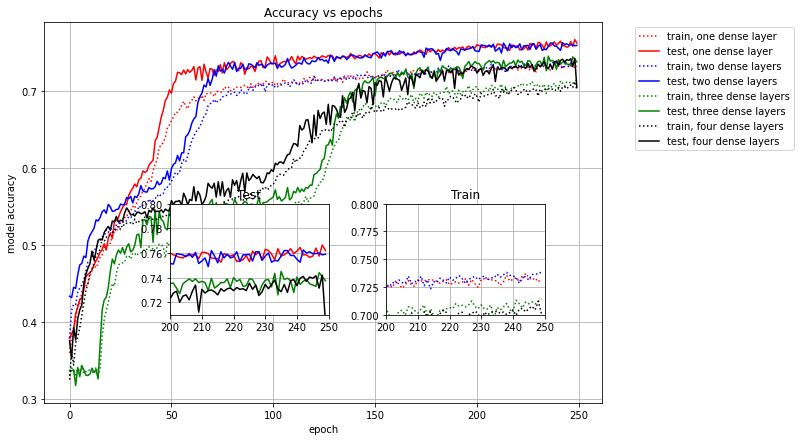

In [9]:
plt.figure(figsize=(10,7))

plt.plot(fit1.history['accuracy'], label='train, one dense layer', c='r', ls='dotted')
plt.plot(fit1.history['val_accuracy'], label='test, one dense layer', c='r')
plt.title('Accuracy vs epochs')
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.grid()

plt.plot(fit2.history['accuracy'], label='train, two dense layers', c='b', ls='dotted')
plt.plot(fit2.history['val_accuracy'], label='test, two dense layers', c='b')
plt.ylabel('model accuracy')
plt.xlabel('epoch')

plt.plot(fit3.history['accuracy'], label='train, three dense layers', c='g', ls='dotted')
plt.plot(fit3.history['val_accuracy'], label='test, three dense layers', c='g')
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(bbox_to_anchor=(1.05, 1))

plt.plot(fit4.history['accuracy'], label='train, four dense layers', c='black', ls='dotted')
plt.plot(fit4.history['val_accuracy'], label='test, four dense layers', c='black')
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(bbox_to_anchor=(1.05, 1))

# test additional axes
a = plt.axes([.3, .3, .22, .22])
plt.plot(fit1.history['val_accuracy'], label='test, one dense layers', c='r')
plt.plot(fit2.history['val_accuracy'], label='test, two dense layers', c='b')
plt.plot(fit3.history['val_accuracy'], label='test, three dense layers', c='g')
plt.plot(fit4.history['val_accuracy'], label='test, four dense layers', c='black')
plt.title('Test')
plt.xlim(200,250)
plt.ylim(0.71,0.8)
plt.grid()

# train additional axes
a = plt.axes([.6, .3, .22, .22])
plt.plot(fit1.history['accuracy'], label='train, one dense layers', c='r', ls='dotted')
plt.plot(fit2.history['accuracy'], label='train, two dense layers', c='b', ls='dotted')
plt.plot(fit3.history['accuracy'], label='train, three dense layers', c='g', ls='dotted')
plt.plot(fit4.history['accuracy'], label='train, four dense layers', c='black', ls='dotted')
plt.title('Train')
plt.xlim(200,250)
plt.ylim(0.7,0.8)

plt.grid()
plt.show()

Se ogni dense layer è un classificatore lineare, aggiungere classificatori lineari a classificatori lineari è forse poco sensato.

'Ci prepariamo ad avere 3 output'. Con 10 layer continui continui a rimescolare la stessa informazione. Quindi facciamo 10. 10,7. 10,7,5. 10,7,5,3. 

Primo layer: separatore lineare: se un solo filtro ho 10 modelli che fanno sep lineare su un solo filtro. In quanti modi diversi separazine lineare su 5 dati (?). Se ho un campione più grande ecco che separazione lineare migliore. 

Più di due categorie: one vs one, one vs all. One vs all? Con 3 categorie la cosa più comonda numero di neuroni in un layer multiplo di 3? proviamo

Con numero dispari di Dense meglio, con un numero pari peggio

Proviamo a mettere a 9. 9,7. 9,7,5. 9,7,5,3. Ovvero mettere un numero multiplo di N_categ. 2 dense, 3 dense e 4 dense ora si overlappano come performance e va sopra a tutti quello con 1. A livello di train sono praticamente uguali.

Proviamo a mettere a 9. 9,6. 9,6,3. 9,6,3,3. Scheramata 15:56


Proviamo a togliere il dropout. Schermata 16:00. Siamo abbastanza convinti nel dire che basta solamente un dense layer perché è quello che mediamente ha performato meglio di tutti.

Proviamo a mettere il dropour a 0.1.  Qui le cose vanno decisamente meglio che se non 0.2

Proviamo con il dropout a 0.2 dopo il flatten. 

Proviamo a cambiare su model 1 le activation functions in tanh e elu e peggiora.

### adding conv1d

In [33]:
model = Sequential()
model.add(Conv1D(                                       #First layer:
                filters = 5,
                kernel_size = 9,                       #like Z = 12
                kernel_regularizer = reg,
                kernel_initializer = ini,
                activation = 'relu',
                input_shape = input_shape
                ))

model.add(AveragePooling1D(4)) #Reduce 5 -> 1

model.add(Conv1D(filters=5, kernel_size=7, activation=
                'relu'))

model.add(Flatten())                                     #Move to GNN
model.add(Dense(8,activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(N_categ,activation = 'softmax'))

print(model.summary()) 


model.compile(loss = tensorflow.keras.losses.categorical_crossentropy,
              optimizer = 'adam', metrics = ['accuracy'])

trainable_count5 = count_params(model.trainable_weights)

fit5 = model.fit(x_train,
                y_train,
                batch_size=batch_size,
                epochs=epochs,
                validation_data = (x_val,y_val),
                verbose = 0
               )


Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_39 (Conv1D)           (None, 52, 5)             50        
_________________________________________________________________
average_pooling1d_19 (Averag (None, 13, 5)             0         
_________________________________________________________________
conv1d_40 (Conv1D)           (None, 7, 5)              180       
_________________________________________________________________
flatten_17 (Flatten)         (None, 35)                0         
_________________________________________________________________
dense_39 (Dense)             (None, 8)                 288       
_________________________________________________________________
dropout_17 (Dropout)         (None, 8)                 0         
_________________________________________________________________
dense_40 (Dense)             (None, 3)               

In [46]:
model = Sequential()
model.add(Conv1D(                                       #First layer:
                filters = 5,
                kernel_size = 9,                       #like Z = 12
                kernel_regularizer = reg,
                kernel_initializer = ini,
                activation = 'relu',
                input_shape = input_shape
                ))

model.add(AveragePooling1D(4)) #Reduce 5 -> 1

model.add(Conv1D(filters=5, kernel_size=7, activation=
                'relu'))

model.add(Conv1D(filters=5, kernel_size=4, activation=
                'relu'))

model.add(Flatten())                                     #Move to GNN
model.add(Dense(8,activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(N_categ,activation = 'softmax'))

print(model.summary()) 



model.compile(loss = tensorflow.keras.losses.categorical_crossentropy,
              optimizer = 'adam', metrics = ['accuracy'])

trainable_count6 = count_params(model.trainable_weights)

fit6 = model.fit(x_train,
                y_train,
                batch_size=batch_size,
                epochs=epochs,
                validation_data = (x_val,y_val),
                verbose = 0
               )


Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_59 (Conv1D)           (None, 52, 5)             50        
_________________________________________________________________
average_pooling1d_26 (Averag (None, 13, 5)             0         
_________________________________________________________________
conv1d_60 (Conv1D)           (None, 7, 5)              180       
_________________________________________________________________
conv1d_61 (Conv1D)           (None, 4, 5)              105       
_________________________________________________________________
flatten_24 (Flatten)         (None, 20)                0         
_________________________________________________________________
dense_52 (Dense)             (None, 8)                 168       
_________________________________________________________________
dropout_23 (Dropout)         (None, 8)               

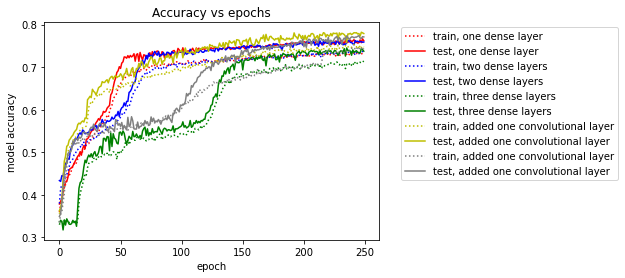

In [44]:
plt.plot(fit1.history['accuracy'], label='train, one dense layer', c='r', ls='dotted')
plt.plot(fit1.history['val_accuracy'], label='test, one dense layer', c='r')
plt.title('Accuracy vs epochs')
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.grid()

plt.plot(fit2.history['accuracy'], label='train, two dense layers', c='b', ls='dotted')
plt.plot(fit2.history['val_accuracy'], label='test, two dense layers', c='b')
plt.ylabel('model accuracy')
plt.xlabel('epoch')



plt.plot(fit3.history['accuracy'], label='train, three dense layers', c='g', ls='dotted')
plt.plot(fit3.history['val_accuracy'], label='test, three dense layers', c='g')
plt.ylabel('model accuracy')
plt.xlabel('epoch')

plt.grid()

plt.plot(fit5.history['accuracy'], label='train, added one convolutional layer', c='y', ls='dotted')
plt.plot(fit5.history['val_accuracy'], label='test, added one convolutional layer', c='y')
plt.title('Accuracy vs epochs')
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.grid()


plt.plot(fit6.history['accuracy'], label='train, added one convolutional layer', c='grey', ls='dotted')
plt.plot(fit6.history['val_accuracy'], label='test, added one convolutional layer', c='grey')
plt.title('Accuracy vs epochs')
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.grid()
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()


In [ ]:
print(trainable_count)

## Regularization 

In [53]:
def get_model(k_reg):
    model = Sequential()
    model.add(Conv1D(                                       #First layer:
                filters = 5,
                kernel_size = 9,                       #like Z = 12
                kernel_regularizer = reg,
                kernel_initializer = ini,
                activation = 'relu',
                input_shape = input_shape
                ))

    model.add(AveragePooling1D(4)) #Reduce 5 -> 1

    model.add(Conv1D(filters=5, kernel_size=7, activation=
                'relu'))

    model.add(Conv1D(filters=5, kernel_size=4, activation=
                'relu'))

    model.add(Flatten())                                     #Move to GNN
    model.add(Dense(8,activation = 'relu'))
    model.add(Dropout(0.2))
    model.add(Dense(N_categ,activation = 'softmax'))

    model.compile(loss = tensorflow.keras.losses.categorical_crossentropy,
              optimizer = 'adam', metrics = ['accuracy'])

    
    return model

# list of allowed optional arguments for the optimizer, see compile_model()

#dropout_rate = [0.1, 0.2, 0.3, 0.4, 0.5]
#batch_size = [60, 300, 500]

#learning_rate = [0.05, 0.1, 0.5]

param_grid = {
    'k_reg': [ regularizers.l2(0.01), regularizers.l2(0.001), regularizers.l2(0.0001),
             regularizers.l1(0.01), regularizers.l1(0.001), regularizers.l1(0.0001),
             regularizers.l1_l2(0.01), regularizers.l1_l2(0.001), regularizers.l1_l2(0.0001)]
}

my_classifier = KerasClassifier(get_model, batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(my_classifier, param_grid, n_jobs = 1,
                    #cv = 4,
                    verbose=2)

grid.fit(x_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] k_reg=<tensorflow.python.keras.regularizers.L2 object at 0x7f2fbd3ae0a0> 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Epoch 1/250
26/26 [==============================] - 2s 10ms/step - loss: 1.1002 - accuracy: 0.3230
Epoch 2/250
26/26 [==============================] - 0s 10ms/step - loss: 1.0970 - accuracy: 0.3551
Epoch 3/250
26/26 [==============================] - 0s 11ms/step - loss: 1.0943 - accuracy: 0.3770
Epoch 4/250
26/26 [==============================] - 0s 10ms/step - loss: 1.0873 - accuracy: 0.3864
Epoch 5/250
26/26 [==============================] - 0s 10ms/step - loss: 1.0789 - accuracy: 0.4115
Epoch 6/250
26/26 [==============================] - 0s 10ms/step - loss: 1.0668 - accuracy: 0.4181
Epoch 7/250
26/26 [==============================] - 0s 10ms/step - loss: 1.0456 - accuracy: 0.4432
Epoch 8/250
26/26 [==============================] - 0s 10ms/step - loss: 1.0283 - accuracy: 0.4483
Epoch 9/250
26/26 [==============================] - 0s 10ms/step - loss: 1.0117 - accuracy: 0.4711
Epoch 10/250
26/26 [==============================] - 0s 10ms/step - loss: 0.9959 - accuracy: 0.4919

26/26 [==============================] - 0s 13ms/step - loss: 0.6683 - accuracy: 0.6765
Epoch 83/250
26/26 [==============================] - 0s 16ms/step - loss: 0.6754 - accuracy: 0.6699
Epoch 84/250
26/26 [==============================] - 0s 15ms/step - loss: 0.6615 - accuracy: 0.6707
Epoch 85/250
26/26 [==============================] - 0s 16ms/step - loss: 0.6602 - accuracy: 0.6733
Epoch 86/250
26/26 [==============================] - 0s 12ms/step - loss: 0.6534 - accuracy: 0.6817
Epoch 87/250
26/26 [==============================] - 0s 11ms/step - loss: 0.6678 - accuracy: 0.6651
Epoch 88/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6646 - accuracy: 0.6733
Epoch 89/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6654 - accuracy: 0.6624
Epoch 90/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6581 - accuracy: 0.6953
Epoch 91/250
26/26 [==============================] - 0s 10ms/step - loss: 0.6735 - accuracy: 0.6849
Epoch 

26/26 [==============================] - 0s 11ms/step - loss: 0.6213 - accuracy: 0.7148
Epoch 163/250
26/26 [==============================] - 0s 10ms/step - loss: 0.6419 - accuracy: 0.7072
Epoch 164/250
26/26 [==============================] - 0s 10ms/step - loss: 0.6337 - accuracy: 0.7079
Epoch 165/250
26/26 [==============================] - 0s 11ms/step - loss: 0.6244 - accuracy: 0.7135
Epoch 166/250
26/26 [==============================] - 0s 10ms/step - loss: 0.6327 - accuracy: 0.7046
Epoch 167/250
26/26 [==============================] - 0s 10ms/step - loss: 0.6382 - accuracy: 0.7104
Epoch 168/250
26/26 [==============================] - 0s 11ms/step - loss: 0.6413 - accuracy: 0.7148
Epoch 169/250
26/26 [==============================] - 0s 11ms/step - loss: 0.6308 - accuracy: 0.7106
Epoch 170/250
26/26 [==============================] - 0s 10ms/step - loss: 0.6368 - accuracy: 0.7059
Epoch 171/250
26/26 [==============================] - 0s 10ms/step - loss: 0.6188 - accuracy: 0

26/26 [==============================] - 0s 10ms/step - loss: 0.6167 - accuracy: 0.7282
Epoch 243/250
26/26 [==============================] - 0s 10ms/step - loss: 0.6084 - accuracy: 0.7245
Epoch 244/250
26/26 [==============================] - 0s 10ms/step - loss: 0.6117 - accuracy: 0.7308
Epoch 245/250
26/26 [==============================] - 0s 10ms/step - loss: 0.6121 - accuracy: 0.7179
Epoch 246/250
26/26 [==============================] - 0s 10ms/step - loss: 0.6071 - accuracy: 0.7237
Epoch 247/250
26/26 [==============================] - 0s 11ms/step - loss: 0.6062 - accuracy: 0.7243
Epoch 248/250
26/26 [==============================] - 0s 10ms/step - loss: 0.6143 - accuracy: 0.7158
Epoch 249/250
26/26 [==============================] - 0s 10ms/step - loss: 0.6164 - accuracy: 0.7212
Epoch 250/250
7/7 [==============================] - 0s 6ms/step - loss: 0.6206 - accuracy: 0.7175
[CV]  k_reg=<tensorflow.python.keras.regularizers.L2 object at 0x7f2fbd3ae0a0>, total= 1.2min
[CV] 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.2min remaining:    0.0s


Epoch 1/250
26/26 [==============================] - 1s 10ms/step - loss: 1.1000 - accuracy: 0.3390
Epoch 2/250
26/26 [==============================] - 0s 10ms/step - loss: 1.0983 - accuracy: 0.3766
Epoch 3/250
26/26 [==============================] - 0s 10ms/step - loss: 1.0952 - accuracy: 0.3910
Epoch 4/250
26/26 [==============================] - 0s 11ms/step - loss: 1.0874 - accuracy: 0.4168
Epoch 5/250
26/26 [==============================] - 0s 14ms/step - loss: 1.0712 - accuracy: 0.4264
Epoch 6/250
26/26 [==============================] - 0s 10ms/step - loss: 1.0415 - accuracy: 0.4435
Epoch 7/250
26/26 [==============================] - 0s 10ms/step - loss: 1.0218 - accuracy: 0.4552
Epoch 8/250
26/26 [==============================] - 0s 10ms/step - loss: 0.9906 - accuracy: 0.4743
Epoch 9/250
26/26 [==============================] - 0s 10ms/step - loss: 0.9865 - accuracy: 0.4766
Epoch 10/250
26/26 [==============================] - 0s 10ms/step - loss: 0.9546 - accuracy: 0.5016

26/26 [==============================] - 0s 10ms/step - loss: 0.6808 - accuracy: 0.6773
Epoch 83/250
26/26 [==============================] - 0s 10ms/step - loss: 0.6791 - accuracy: 0.6780
Epoch 84/250
26/26 [==============================] - 0s 10ms/step - loss: 0.6774 - accuracy: 0.6876
Epoch 85/250
26/26 [==============================] - 0s 10ms/step - loss: 0.6715 - accuracy: 0.6824
Epoch 86/250
26/26 [==============================] - 0s 10ms/step - loss: 0.6727 - accuracy: 0.6929
Epoch 87/250
26/26 [==============================] - 0s 10ms/step - loss: 0.6695 - accuracy: 0.6941
Epoch 88/250
26/26 [==============================] - 0s 10ms/step - loss: 0.6792 - accuracy: 0.6867
Epoch 89/250
26/26 [==============================] - 0s 10ms/step - loss: 0.6699 - accuracy: 0.6906
Epoch 90/250
26/26 [==============================] - 0s 10ms/step - loss: 0.6667 - accuracy: 0.6936
Epoch 91/250
26/26 [==============================] - 0s 10ms/step - loss: 0.6612 - accuracy: 0.6871
Epo

26/26 [==============================] - 0s 10ms/step - loss: 0.5974 - accuracy: 0.7413
Epoch 163/250
26/26 [==============================] - 0s 10ms/step - loss: 0.5914 - accuracy: 0.7385
Epoch 164/250
26/26 [==============================] - 0s 10ms/step - loss: 0.5848 - accuracy: 0.7490
Epoch 165/250
26/26 [==============================] - 0s 10ms/step - loss: 0.5942 - accuracy: 0.7475
Epoch 166/250
26/26 [==============================] - 0s 10ms/step - loss: 0.5866 - accuracy: 0.7412
Epoch 167/250
26/26 [==============================] - 0s 10ms/step - loss: 0.6050 - accuracy: 0.7401
Epoch 168/250
26/26 [==============================] - 0s 10ms/step - loss: 0.6016 - accuracy: 0.7442
Epoch 169/250
26/26 [==============================] - 0s 10ms/step - loss: 0.5855 - accuracy: 0.7544
Epoch 170/250
26/26 [==============================] - 0s 11ms/step - loss: 0.5813 - accuracy: 0.7528
Epoch 171/250
26/26 [==============================] - 0s 11ms/step - loss: 0.5938 - accuracy: 0

26/26 [==============================] - 0s 11ms/step - loss: 0.5496 - accuracy: 0.7722
Epoch 243/250
26/26 [==============================] - 0s 10ms/step - loss: 0.5604 - accuracy: 0.7666
Epoch 244/250
26/26 [==============================] - 0s 10ms/step - loss: 0.5635 - accuracy: 0.7646
Epoch 245/250
26/26 [==============================] - 0s 10ms/step - loss: 0.5612 - accuracy: 0.7682
Epoch 246/250
26/26 [==============================] - 0s 10ms/step - loss: 0.5515 - accuracy: 0.7723
Epoch 247/250
26/26 [==============================] - 0s 10ms/step - loss: 0.5576 - accuracy: 0.7645
Epoch 248/250
26/26 [==============================] - 0s 10ms/step - loss: 0.5523 - accuracy: 0.7789
Epoch 249/250
26/26 [==============================] - 0s 10ms/step - loss: 0.5405 - accuracy: 0.7799
Epoch 250/250
7/7 [==============================] - 0s 5ms/step - loss: 0.5857 - accuracy: 0.7725
[CV]  k_reg=<tensorflow.python.keras.regularizers.L2 object at 0x7f2fbd3ae0a0>, total= 1.2min
[CV] 

26/26 [==============================] - 0s 11ms/step - loss: 0.6929 - accuracy: 0.6625
Epoch 71/250
26/26 [==============================] - 0s 10ms/step - loss: 0.6889 - accuracy: 0.6618
Epoch 72/250
26/26 [==============================] - 0s 10ms/step - loss: 0.6892 - accuracy: 0.6622
Epoch 73/250
26/26 [==============================] - 0s 11ms/step - loss: 0.6840 - accuracy: 0.6735
Epoch 74/250
26/26 [==============================] - 0s 10ms/step - loss: 0.6972 - accuracy: 0.6617
Epoch 75/250
26/26 [==============================] - 0s 10ms/step - loss: 0.6822 - accuracy: 0.6790
Epoch 76/250
26/26 [==============================] - 0s 10ms/step - loss: 0.6840 - accuracy: 0.6754
Epoch 77/250
26/26 [==============================] - 0s 10ms/step - loss: 0.6999 - accuracy: 0.6616
Epoch 78/250
26/26 [==============================] - 0s 10ms/step - loss: 0.6783 - accuracy: 0.6613
Epoch 79/250
26/26 [==============================] - 0s 11ms/step - loss: 0.6877 - accuracy: 0.6584
Epo

26/26 [==============================] - 0s 9ms/step - loss: 0.6219 - accuracy: 0.7264
Epoch 152/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6177 - accuracy: 0.7178
Epoch 153/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6296 - accuracy: 0.7063
Epoch 154/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6228 - accuracy: 0.7220
Epoch 155/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6233 - accuracy: 0.7172
Epoch 156/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6349 - accuracy: 0.7119
Epoch 157/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6242 - accuracy: 0.7244
Epoch 158/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6171 - accuracy: 0.7219
Epoch 159/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6077 - accuracy: 0.7157
Epoch 160/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6188 - accuracy: 0.7210
Epoc

26/26 [==============================] - 0s 9ms/step - loss: 0.5929 - accuracy: 0.7480
Epoch 233/250
26/26 [==============================] - 0s 9ms/step - loss: 0.5923 - accuracy: 0.7428
Epoch 234/250
26/26 [==============================] - 0s 9ms/step - loss: 0.5785 - accuracy: 0.7438
Epoch 235/250
26/26 [==============================] - 0s 9ms/step - loss: 0.5718 - accuracy: 0.7502
Epoch 236/250
26/26 [==============================] - 0s 9ms/step - loss: 0.5994 - accuracy: 0.7365
Epoch 237/250
26/26 [==============================] - 0s 9ms/step - loss: 0.5747 - accuracy: 0.7503
Epoch 238/250
26/26 [==============================] - 0s 9ms/step - loss: 0.5888 - accuracy: 0.7419
Epoch 239/250
26/26 [==============================] - 0s 9ms/step - loss: 0.5874 - accuracy: 0.7429
Epoch 240/250
26/26 [==============================] - 0s 10ms/step - loss: 0.5736 - accuracy: 0.7458
Epoch 241/250
26/26 [==============================] - 0s 9ms/step - loss: 0.5690 - accuracy: 0.7524
Epo

26/26 [==============================] - 0s 10ms/step - loss: 0.6942 - accuracy: 0.6680
Epoch 62/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6823 - accuracy: 0.6741
Epoch 63/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6796 - accuracy: 0.6714
Epoch 64/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6885 - accuracy: 0.6720
Epoch 65/250
26/26 [==============================] - 0s 9ms/step - loss: 0.7042 - accuracy: 0.6717
Epoch 66/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6909 - accuracy: 0.6731
Epoch 67/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6909 - accuracy: 0.6677
Epoch 68/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6887 - accuracy: 0.6773
Epoch 69/250
26/26 [==============================] - 0s 10ms/step - loss: 0.6765 - accuracy: 0.6728
Epoch 70/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6771 - accuracy: 0.6844
Epoch 71/25

26/26 [==============================] - 0s 9ms/step - loss: 0.6442 - accuracy: 0.6929
Epoch 143/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6501 - accuracy: 0.6897
Epoch 144/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6510 - accuracy: 0.6857
Epoch 145/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6446 - accuracy: 0.7051
Epoch 146/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6601 - accuracy: 0.6860
Epoch 147/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6430 - accuracy: 0.7047
Epoch 148/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6471 - accuracy: 0.6950
Epoch 149/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6453 - accuracy: 0.6952
Epoch 150/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6381 - accuracy: 0.6974
Epoch 151/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6354 - accuracy: 0.7036
Epoc

26/26 [==============================] - 0s 9ms/step - loss: 0.6217 - accuracy: 0.7063
Epoch 224/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6283 - accuracy: 0.7097
Epoch 225/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6211 - accuracy: 0.7130
Epoch 226/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6222 - accuracy: 0.7039
Epoch 227/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6377 - accuracy: 0.7045
Epoch 228/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6185 - accuracy: 0.7181
Epoch 229/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6306 - accuracy: 0.7071
Epoch 230/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6254 - accuracy: 0.7101
Epoch 231/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6234 - accuracy: 0.7097
Epoch 232/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6153 - accuracy: 0.7186
Epoc

26/26 [==============================] - 0s 9ms/step - loss: 0.7075 - accuracy: 0.6674
Epoch 53/250
26/26 [==============================] - 0s 9ms/step - loss: 0.7007 - accuracy: 0.6554
Epoch 54/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6959 - accuracy: 0.6750
Epoch 55/250
26/26 [==============================] - 0s 10ms/step - loss: 0.7083 - accuracy: 0.6695
Epoch 56/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6985 - accuracy: 0.6767
Epoch 57/250
26/26 [==============================] - 0s 9ms/step - loss: 0.7041 - accuracy: 0.6688
Epoch 58/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6961 - accuracy: 0.6684
Epoch 59/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6923 - accuracy: 0.6687
Epoch 60/250
26/26 [==============================] - 0s 9ms/step - loss: 0.7043 - accuracy: 0.6590
Epoch 61/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6920 - accuracy: 0.6745
Epoch 62/250

26/26 [==============================] - 0s 10ms/step - loss: 0.6697 - accuracy: 0.6815
Epoch 134/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6597 - accuracy: 0.6854
Epoch 135/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6810 - accuracy: 0.6740
Epoch 136/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6806 - accuracy: 0.6693
Epoch 137/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6702 - accuracy: 0.6784
Epoch 138/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6716 - accuracy: 0.6721
Epoch 139/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6533 - accuracy: 0.6919
Epoch 140/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6647 - accuracy: 0.6831
Epoch 141/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6680 - accuracy: 0.6872
Epoch 142/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6622 - accuracy: 0.6800
Epo

26/26 [==============================] - 0s 9ms/step - loss: 0.6534 - accuracy: 0.6910
Epoch 215/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6413 - accuracy: 0.6930
Epoch 216/250
26/26 [==============================] - 0s 10ms/step - loss: 0.6378 - accuracy: 0.6935
Epoch 217/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6393 - accuracy: 0.6941
Epoch 218/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6502 - accuracy: 0.6854
Epoch 219/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6438 - accuracy: 0.6899
Epoch 220/250
26/26 [==============================] - 0s 10ms/step - loss: 0.6351 - accuracy: 0.6982
Epoch 221/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6404 - accuracy: 0.7036
Epoch 222/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6502 - accuracy: 0.6895
Epoch 223/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6411 - accuracy: 0.6967
Ep

26/26 [==============================] - 0s 9ms/step - loss: 0.6981 - accuracy: 0.6550
Epoch 44/250
26/26 [==============================] - 0s 9ms/step - loss: 0.7032 - accuracy: 0.6355
Epoch 45/250
26/26 [==============================] - 0s 9ms/step - loss: 0.7121 - accuracy: 0.6377
Epoch 46/250
26/26 [==============================] - 0s 9ms/step - loss: 0.7074 - accuracy: 0.6482
Epoch 47/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6939 - accuracy: 0.6497
Epoch 48/250
26/26 [==============================] - 0s 9ms/step - loss: 0.7026 - accuracy: 0.6387
Epoch 49/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6991 - accuracy: 0.6527
Epoch 50/250
26/26 [==============================] - 0s 9ms/step - loss: 0.7005 - accuracy: 0.6504
Epoch 51/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6827 - accuracy: 0.6583
Epoch 52/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6949 - accuracy: 0.6596
Epoch 53/250


26/26 [==============================] - 0s 9ms/step - loss: 0.6486 - accuracy: 0.6939
Epoch 125/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6266 - accuracy: 0.7128
Epoch 126/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6503 - accuracy: 0.6870
Epoch 127/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6234 - accuracy: 0.7049
Epoch 128/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6560 - accuracy: 0.6954
Epoch 129/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6369 - accuracy: 0.7070
Epoch 130/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6361 - accuracy: 0.6978
Epoch 131/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6293 - accuracy: 0.7103
Epoch 132/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6354 - accuracy: 0.7013
Epoch 133/250
26/26 [==============================] - 0s 10ms/step - loss: 0.6323 - accuracy: 0.7043
Epo

26/26 [==============================] - 0s 10ms/step - loss: 0.6058 - accuracy: 0.7341
Epoch 205/250
26/26 [==============================] - 0s 10ms/step - loss: 0.5982 - accuracy: 0.7272
Epoch 206/250
26/26 [==============================] - 0s 10ms/step - loss: 0.5992 - accuracy: 0.7371
Epoch 207/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6035 - accuracy: 0.7380
Epoch 208/250
26/26 [==============================] - 0s 9ms/step - loss: 0.5972 - accuracy: 0.7426
Epoch 209/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6052 - accuracy: 0.7395
Epoch 210/250
26/26 [==============================] - 0s 10ms/step - loss: 0.5928 - accuracy: 0.7401
Epoch 211/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6055 - accuracy: 0.7305
Epoch 212/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6010 - accuracy: 0.7388
Epoch 213/250
26/26 [==============================] - 0s 9ms/step - loss: 0.5889 - accuracy: 0.7360


26/26 [==============================] - 0s 9ms/step - loss: 0.7228 - accuracy: 0.6462
Epoch 34/250
26/26 [==============================] - 0s 9ms/step - loss: 0.7158 - accuracy: 0.6547
Epoch 35/250
26/26 [==============================] - 0s 9ms/step - loss: 0.7058 - accuracy: 0.6574
Epoch 36/250
26/26 [==============================] - 0s 9ms/step - loss: 0.7020 - accuracy: 0.6650
Epoch 37/250
26/26 [==============================] - 0s 9ms/step - loss: 0.7003 - accuracy: 0.6596
Epoch 38/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6933 - accuracy: 0.6706
Epoch 39/250
26/26 [==============================] - 0s 10ms/step - loss: 0.6880 - accuracy: 0.6705
Epoch 40/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6985 - accuracy: 0.6666
Epoch 41/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6835 - accuracy: 0.6716
Epoch 42/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6803 - accuracy: 0.6717
Epoch 43/250

26/26 [==============================] - 0s 9ms/step - loss: 0.6289 - accuracy: 0.7071
Epoch 115/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6298 - accuracy: 0.7036
Epoch 116/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6385 - accuracy: 0.7002
Epoch 117/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6189 - accuracy: 0.7106
Epoch 118/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6306 - accuracy: 0.7078
Epoch 119/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6156 - accuracy: 0.7069
Epoch 120/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6358 - accuracy: 0.6950
Epoch 121/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6340 - accuracy: 0.6999
Epoch 122/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6225 - accuracy: 0.7172
Epoch 123/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6330 - accuracy: 0.7034
Epoc

26/26 [==============================] - 0s 9ms/step - loss: 0.6143 - accuracy: 0.7183
Epoch 196/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6220 - accuracy: 0.7126
Epoch 197/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6026 - accuracy: 0.7142
Epoch 198/250
26/26 [==============================] - 0s 9ms/step - loss: 0.5972 - accuracy: 0.7266
Epoch 199/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6093 - accuracy: 0.7168
Epoch 200/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6019 - accuracy: 0.7177
Epoch 201/250
26/26 [==============================] - 0s 9ms/step - loss: 0.5973 - accuracy: 0.7205
Epoch 202/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6057 - accuracy: 0.7179
Epoch 203/250
26/26 [==============================] - 0s 9ms/step - loss: 0.5939 - accuracy: 0.7195
Epoch 204/250
26/26 [==============================] - 0s 9ms/step - loss: 0.5993 - accuracy: 0.7204
Epoc

Epoch 24/250
26/26 [==============================] - 0s 9ms/step - loss: 0.9307 - accuracy: 0.5211
Epoch 25/250
26/26 [==============================] - 0s 9ms/step - loss: 0.9137 - accuracy: 0.5356
Epoch 26/250
26/26 [==============================] - 0s 9ms/step - loss: 0.9246 - accuracy: 0.5241
Epoch 27/250
26/26 [==============================] - 0s 9ms/step - loss: 0.9203 - accuracy: 0.5251
Epoch 28/250
26/26 [==============================] - 0s 9ms/step - loss: 0.9179 - accuracy: 0.5246
Epoch 29/250
26/26 [==============================] - 0s 9ms/step - loss: 0.9065 - accuracy: 0.5289
Epoch 30/250
26/26 [==============================] - 0s 9ms/step - loss: 0.9024 - accuracy: 0.5377
Epoch 31/250
26/26 [==============================] - 0s 10ms/step - loss: 0.9063 - accuracy: 0.5296
Epoch 32/250
26/26 [==============================] - 0s 9ms/step - loss: 0.8978 - accuracy: 0.5284
Epoch 33/250
26/26 [==============================] - 0s 9ms/step - loss: 0.8872 - accuracy: 0.5445

26/26 [==============================] - 0s 9ms/step - loss: 0.8284 - accuracy: 0.5586
Epoch 106/250
26/26 [==============================] - 0s 9ms/step - loss: 0.8287 - accuracy: 0.5546
Epoch 107/250
26/26 [==============================] - 0s 9ms/step - loss: 0.8305 - accuracy: 0.5647
Epoch 108/250
26/26 [==============================] - 0s 9ms/step - loss: 0.8264 - accuracy: 0.5630
Epoch 109/250
26/26 [==============================] - 0s 9ms/step - loss: 0.8280 - accuracy: 0.5681
Epoch 110/250
26/26 [==============================] - 0s 9ms/step - loss: 0.8206 - accuracy: 0.5663
Epoch 111/250
26/26 [==============================] - 0s 9ms/step - loss: 0.8237 - accuracy: 0.5747
Epoch 112/250
26/26 [==============================] - 0s 9ms/step - loss: 0.8314 - accuracy: 0.5549
Epoch 113/250
26/26 [==============================] - 0s 9ms/step - loss: 0.8245 - accuracy: 0.5679
Epoch 114/250
26/26 [==============================] - 0s 9ms/step - loss: 0.8258 - accuracy: 0.5595
Epoc

26/26 [==============================] - 0s 9ms/step - loss: 0.7145 - accuracy: 0.6316
Epoch 187/250
26/26 [==============================] - 0s 9ms/step - loss: 0.7154 - accuracy: 0.6318
Epoch 188/250
26/26 [==============================] - 0s 9ms/step - loss: 0.7164 - accuracy: 0.6287
Epoch 189/250
26/26 [==============================] - 0s 9ms/step - loss: 0.7062 - accuracy: 0.6390
Epoch 190/250
26/26 [==============================] - 0s 9ms/step - loss: 0.7173 - accuracy: 0.6376
Epoch 191/250
26/26 [==============================] - 0s 9ms/step - loss: 0.7132 - accuracy: 0.6427
Epoch 192/250
26/26 [==============================] - 0s 9ms/step - loss: 0.7010 - accuracy: 0.6516
Epoch 193/250
26/26 [==============================] - 0s 9ms/step - loss: 0.7120 - accuracy: 0.6385
Epoch 194/250
26/26 [==============================] - 0s 10ms/step - loss: 0.7076 - accuracy: 0.6511
Epoch 195/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6994 - accuracy: 0.6378
Epo

26/26 [==============================] - 0s 9ms/step - loss: 0.9086 - accuracy: 0.5154
Epoch 15/250
26/26 [==============================] - 0s 9ms/step - loss: 0.8930 - accuracy: 0.5330
Epoch 16/250
26/26 [==============================] - 0s 9ms/step - loss: 0.8874 - accuracy: 0.5504
Epoch 17/250
26/26 [==============================] - 0s 9ms/step - loss: 0.8903 - accuracy: 0.5321
Epoch 18/250
26/26 [==============================] - 0s 9ms/step - loss: 0.8651 - accuracy: 0.5411
Epoch 19/250
26/26 [==============================] - 0s 9ms/step - loss: 0.8578 - accuracy: 0.5429
Epoch 20/250
26/26 [==============================] - 0s 10ms/step - loss: 0.8511 - accuracy: 0.5427
Epoch 21/250
26/26 [==============================] - 0s 9ms/step - loss: 0.8503 - accuracy: 0.5466
Epoch 22/250
26/26 [==============================] - 0s 9ms/step - loss: 0.8535 - accuracy: 0.5465
Epoch 23/250
26/26 [==============================] - 0s 9ms/step - loss: 0.8543 - accuracy: 0.5468
Epoch 24/250

26/26 [==============================] - 0s 9ms/step - loss: 0.7020 - accuracy: 0.6553
Epoch 97/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6838 - accuracy: 0.6718
Epoch 98/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6841 - accuracy: 0.6848
Epoch 99/250
26/26 [==============================] - 0s 10ms/step - loss: 0.6674 - accuracy: 0.6793
Epoch 100/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6796 - accuracy: 0.6797
Epoch 101/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6796 - accuracy: 0.6685
Epoch 102/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6878 - accuracy: 0.6615
Epoch 103/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6858 - accuracy: 0.6741
Epoch 104/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6704 - accuracy: 0.6762
Epoch 105/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6887 - accuracy: 0.6671
Epoch 

26/26 [==============================] - 0s 9ms/step - loss: 0.6379 - accuracy: 0.7053
Epoch 178/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6322 - accuracy: 0.7022
Epoch 179/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6293 - accuracy: 0.7060
Epoch 180/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6329 - accuracy: 0.7088
Epoch 181/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6458 - accuracy: 0.6996
Epoch 182/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6187 - accuracy: 0.7109
Epoch 183/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6221 - accuracy: 0.7166
Epoch 184/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6323 - accuracy: 0.7104
Epoch 185/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6322 - accuracy: 0.7078
Epoch 186/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6426 - accuracy: 0.7010
Epoc

26/26 [==============================] - 0s 9ms/step - loss: 1.0623 - accuracy: 0.4335
Epoch 6/250
26/26 [==============================] - 0s 9ms/step - loss: 1.0439 - accuracy: 0.4574
Epoch 7/250
26/26 [==============================] - 0s 9ms/step - loss: 1.0308 - accuracy: 0.4581
Epoch 8/250
26/26 [==============================] - 0s 9ms/step - loss: 1.0070 - accuracy: 0.4723
Epoch 9/250
26/26 [==============================] - 0s 9ms/step - loss: 0.9840 - accuracy: 0.4813
Epoch 10/250
26/26 [==============================] - 0s 9ms/step - loss: 0.9529 - accuracy: 0.5054
Epoch 11/250
26/26 [==============================] - 0s 9ms/step - loss: 0.9238 - accuracy: 0.5143
Epoch 12/250
26/26 [==============================] - 0s 9ms/step - loss: 0.8868 - accuracy: 0.5450
Epoch 13/250
26/26 [==============================] - 0s 9ms/step - loss: 0.8575 - accuracy: 0.5561
Epoch 14/250
26/26 [==============================] - 0s 9ms/step - loss: 0.8162 - accuracy: 0.5986
Epoch 15/250
26/2

26/26 [==============================] - 0s 9ms/step - loss: 0.6547 - accuracy: 0.6951
Epoch 88/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6637 - accuracy: 0.6832
Epoch 89/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6559 - accuracy: 0.6924
Epoch 90/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6799 - accuracy: 0.6649
Epoch 91/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6652 - accuracy: 0.6794
Epoch 92/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6477 - accuracy: 0.6967
Epoch 93/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6456 - accuracy: 0.6985
Epoch 94/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6752 - accuracy: 0.6759
Epoch 95/250
26/26 [==============================] - 0s 10ms/step - loss: 0.6548 - accuracy: 0.6869
Epoch 96/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6550 - accuracy: 0.6863
Epoch 97/250

26/26 [==============================] - 0s 9ms/step - loss: 0.6096 - accuracy: 0.7243
Epoch 169/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6370 - accuracy: 0.7067
Epoch 170/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6204 - accuracy: 0.7129
Epoch 171/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6183 - accuracy: 0.7212
Epoch 172/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6185 - accuracy: 0.7157
Epoch 173/250
26/26 [==============================] - 0s 9ms/step - loss: 0.5997 - accuracy: 0.7319
Epoch 174/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6100 - accuracy: 0.7302
Epoch 175/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6169 - accuracy: 0.7247
Epoch 176/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6211 - accuracy: 0.7198
Epoch 177/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6118 - accuracy: 0.7245
Epoc

26/26 [==============================] - 0s 9ms/step - loss: 0.5869 - accuracy: 0.7464
Epoch 250/250
7/7 [==============================] - 0s 5ms/step - loss: 0.5920 - accuracy: 0.7369
[CV]  k_reg=<tensorflow.python.keras.regularizers.L2 object at 0x7f2fc5371f10>, total= 1.0min
[CV] k_reg=<tensorflow.python.keras.regularizers.L2 object at 0x7f2fc05f25b0> 
Epoch 1/250
26/26 [==============================] - 1s 9ms/step - loss: 1.1002 - accuracy: 0.3339
Epoch 2/250
26/26 [==============================] - 0s 9ms/step - loss: 1.0992 - accuracy: 0.3352
Epoch 3/250
26/26 [==============================] - 0s 9ms/step - loss: 1.0987 - accuracy: 0.3396
Epoch 4/250
26/26 [==============================] - 0s 9ms/step - loss: 1.0981 - accuracy: 0.3719
Epoch 5/250
26/26 [==============================] - 0s 9ms/step - loss: 1.0977 - accuracy: 0.3807
Epoch 6/250
26/26 [==============================] - 0s 9ms/step - loss: 1.0957 - accuracy: 0.3923
Epoch 7/250
26/26 [============================

26/26 [==============================] - 0s 9ms/step - loss: 0.7273 - accuracy: 0.6062
Epoch 79/250
26/26 [==============================] - 0s 9ms/step - loss: 0.7245 - accuracy: 0.6039
Epoch 80/250
26/26 [==============================] - 0s 9ms/step - loss: 0.7210 - accuracy: 0.6013
Epoch 81/250
26/26 [==============================] - 0s 9ms/step - loss: 0.7162 - accuracy: 0.5980
Epoch 82/250
26/26 [==============================] - 0s 10ms/step - loss: 0.7273 - accuracy: 0.6047
Epoch 83/250
26/26 [==============================] - 0s 9ms/step - loss: 0.7300 - accuracy: 0.5983
Epoch 84/250
26/26 [==============================] - 0s 9ms/step - loss: 0.7219 - accuracy: 0.6010
Epoch 85/250
26/26 [==============================] - 0s 9ms/step - loss: 0.7247 - accuracy: 0.6082
Epoch 86/250
26/26 [==============================] - 0s 9ms/step - loss: 0.7257 - accuracy: 0.5911
Epoch 87/250
26/26 [==============================] - 0s 9ms/step - loss: 0.7224 - accuracy: 0.6003
Epoch 88/250

26/26 [==============================] - 0s 9ms/step - loss: 0.6596 - accuracy: 0.6453
Epoch 160/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6574 - accuracy: 0.6534
Epoch 161/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6594 - accuracy: 0.6459
Epoch 162/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6571 - accuracy: 0.6520
Epoch 163/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6597 - accuracy: 0.6660
Epoch 164/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6564 - accuracy: 0.6452
Epoch 165/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6520 - accuracy: 0.6404
Epoch 166/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6511 - accuracy: 0.6641
Epoch 167/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6571 - accuracy: 0.6468
Epoch 168/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6461 - accuracy: 0.6498
Epoc

26/26 [==============================] - 0s 9ms/step - loss: 0.6384 - accuracy: 0.6847
Epoch 241/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6387 - accuracy: 0.6873
Epoch 242/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6399 - accuracy: 0.6880
Epoch 243/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6164 - accuracy: 0.7007
Epoch 244/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6385 - accuracy: 0.6922
Epoch 245/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6302 - accuracy: 0.6945
Epoch 246/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6372 - accuracy: 0.6924
Epoch 247/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6403 - accuracy: 0.6836
Epoch 248/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6392 - accuracy: 0.6919
Epoch 249/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6234 - accuracy: 0.6910
Epoc

26/26 [==============================] - 0s 9ms/step - loss: 0.7339 - accuracy: 0.5999
Epoch 70/250
26/26 [==============================] - 0s 10ms/step - loss: 0.7181 - accuracy: 0.6170
Epoch 71/250
26/26 [==============================] - 0s 9ms/step - loss: 0.7166 - accuracy: 0.6124
Epoch 72/250
26/26 [==============================] - 0s 9ms/step - loss: 0.7240 - accuracy: 0.6105
Epoch 73/250
26/26 [==============================] - 0s 9ms/step - loss: 0.7225 - accuracy: 0.6215
Epoch 74/250
26/26 [==============================] - 0s 9ms/step - loss: 0.7171 - accuracy: 0.6197
Epoch 75/250
26/26 [==============================] - 0s 9ms/step - loss: 0.7130 - accuracy: 0.6137
Epoch 76/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6958 - accuracy: 0.6250
Epoch 77/250
26/26 [==============================] - 0s 9ms/step - loss: 0.7225 - accuracy: 0.6215
Epoch 78/250
26/26 [==============================] - 0s 9ms/step - loss: 0.7015 - accuracy: 0.6277
Epoch 79/250

26/26 [==============================] - 0s 9ms/step - loss: 0.6465 - accuracy: 0.6828
Epoch 151/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6442 - accuracy: 0.6792
Epoch 152/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6469 - accuracy: 0.6821
Epoch 153/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6415 - accuracy: 0.6765
Epoch 154/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6567 - accuracy: 0.6839
Epoch 155/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6547 - accuracy: 0.6730
Epoch 156/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6459 - accuracy: 0.6812
Epoch 157/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6375 - accuracy: 0.6826
Epoch 158/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6418 - accuracy: 0.6807
Epoch 159/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6660 - accuracy: 0.6753
Epoc

26/26 [==============================] - 0s 9ms/step - loss: 0.6229 - accuracy: 0.6971
Epoch 232/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6239 - accuracy: 0.6928
Epoch 233/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6282 - accuracy: 0.6941
Epoch 234/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6197 - accuracy: 0.6948
Epoch 235/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6229 - accuracy: 0.6933
Epoch 236/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6243 - accuracy: 0.7023
Epoch 237/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6263 - accuracy: 0.6899
Epoch 238/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6303 - accuracy: 0.6918
Epoch 239/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6371 - accuracy: 0.6787
Epoch 240/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6218 - accuracy: 0.6824
Epoc

26/26 [==============================] - 0s 9ms/step - loss: 0.7106 - accuracy: 0.6484
Epoch 61/250
26/26 [==============================] - 0s 9ms/step - loss: 0.7227 - accuracy: 0.6431
Epoch 62/250
26/26 [==============================] - 0s 9ms/step - loss: 0.7213 - accuracy: 0.6496
Epoch 63/250
26/26 [==============================] - 0s 9ms/step - loss: 0.7137 - accuracy: 0.6457
Epoch 64/250
26/26 [==============================] - 0s 9ms/step - loss: 0.7138 - accuracy: 0.6411
Epoch 65/250
26/26 [==============================] - 0s 9ms/step - loss: 0.7093 - accuracy: 0.6531
Epoch 66/250
26/26 [==============================] - 0s 9ms/step - loss: 0.7246 - accuracy: 0.6389
Epoch 67/250
26/26 [==============================] - 0s 9ms/step - loss: 0.7114 - accuracy: 0.6490
Epoch 68/250
26/26 [==============================] - 0s 10ms/step - loss: 0.7054 - accuracy: 0.6565
Epoch 69/250
26/26 [==============================] - 0s 9ms/step - loss: 0.7056 - accuracy: 0.6552
Epoch 70/250

26/26 [==============================] - 0s 9ms/step - loss: 0.6585 - accuracy: 0.6818
Epoch 142/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6417 - accuracy: 0.7000
Epoch 143/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6414 - accuracy: 0.6971
Epoch 144/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6400 - accuracy: 0.6930
Epoch 145/250
26/26 [==============================] - 0s 10ms/step - loss: 0.6593 - accuracy: 0.6780
Epoch 146/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6452 - accuracy: 0.6936
Epoch 147/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6537 - accuracy: 0.6925
Epoch 148/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6545 - accuracy: 0.6986
Epoch 149/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6438 - accuracy: 0.6953
Epoch 150/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6533 - accuracy: 0.6948
Epo

26/26 [==============================] - 0s 9ms/step - loss: 0.6221 - accuracy: 0.7134
Epoch 223/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6316 - accuracy: 0.7105
Epoch 224/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6329 - accuracy: 0.7020
Epoch 225/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6177 - accuracy: 0.7153
Epoch 226/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6233 - accuracy: 0.7134
Epoch 227/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6184 - accuracy: 0.7206
Epoch 228/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6161 - accuracy: 0.7120
Epoch 229/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6041 - accuracy: 0.7292
Epoch 230/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6071 - accuracy: 0.7235
Epoch 231/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6234 - accuracy: 0.7176
Epoc

26/26 [==============================] - 0s 10ms/step - loss: 0.7421 - accuracy: 0.6066
Epoch 52/250
26/26 [==============================] - 0s 9ms/step - loss: 0.7236 - accuracy: 0.6150
Epoch 53/250
26/26 [==============================] - 0s 9ms/step - loss: 0.7355 - accuracy: 0.6142
Epoch 54/250
26/26 [==============================] - 0s 9ms/step - loss: 0.7248 - accuracy: 0.6167
Epoch 55/250
26/26 [==============================] - 0s 9ms/step - loss: 0.7222 - accuracy: 0.6112
Epoch 56/250
26/26 [==============================] - 0s 9ms/step - loss: 0.7109 - accuracy: 0.6200
Epoch 57/250
26/26 [==============================] - 0s 9ms/step - loss: 0.7177 - accuracy: 0.6137
Epoch 58/250
26/26 [==============================] - 0s 9ms/step - loss: 0.7226 - accuracy: 0.6298
Epoch 59/250
26/26 [==============================] - 0s 9ms/step - loss: 0.7157 - accuracy: 0.6242
Epoch 60/250
26/26 [==============================] - 0s 9ms/step - loss: 0.7199 - accuracy: 0.6204
Epoch 61/250

26/26 [==============================] - 0s 9ms/step - loss: 0.6590 - accuracy: 0.6540
Epoch 133/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6607 - accuracy: 0.6595
Epoch 134/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6587 - accuracy: 0.6596
Epoch 135/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6511 - accuracy: 0.6717
Epoch 136/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6801 - accuracy: 0.6447
Epoch 137/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6547 - accuracy: 0.6540
Epoch 138/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6659 - accuracy: 0.6510
Epoch 139/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6732 - accuracy: 0.6555
Epoch 140/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6576 - accuracy: 0.6581
Epoch 141/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6694 - accuracy: 0.6508
Epoc

26/26 [==============================] - 0s 9ms/step - loss: 0.6446 - accuracy: 0.6778
Epoch 214/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6319 - accuracy: 0.6878
Epoch 215/250
26/26 [==============================] - 0s 10ms/step - loss: 0.6438 - accuracy: 0.6867
Epoch 216/250
26/26 [==============================] - 0s 10ms/step - loss: 0.6437 - accuracy: 0.6837
Epoch 217/250
26/26 [==============================] - 0s 10ms/step - loss: 0.6403 - accuracy: 0.6905
Epoch 218/250
26/26 [==============================] - 0s 10ms/step - loss: 0.6278 - accuracy: 0.6865
Epoch 219/250
26/26 [==============================] - 0s 10ms/step - loss: 0.6358 - accuracy: 0.6898
Epoch 220/250
26/26 [==============================] - 0s 10ms/step - loss: 0.6370 - accuracy: 0.6770
Epoch 221/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6286 - accuracy: 0.6921
Epoch 222/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6345 - accuracy: 0.685

26/26 [==============================] - 0s 9ms/step - loss: 0.7350 - accuracy: 0.6452
Epoch 43/250
26/26 [==============================] - 0s 9ms/step - loss: 0.7261 - accuracy: 0.6462
Epoch 44/250
26/26 [==============================] - 0s 9ms/step - loss: 0.7142 - accuracy: 0.6478
Epoch 45/250
26/26 [==============================] - 0s 10ms/step - loss: 0.7231 - accuracy: 0.6511
Epoch 46/250
26/26 [==============================] - 0s 9ms/step - loss: 0.7185 - accuracy: 0.6547
Epoch 47/250
26/26 [==============================] - 0s 9ms/step - loss: 0.7329 - accuracy: 0.6421
Epoch 48/250
26/26 [==============================] - 0s 9ms/step - loss: 0.7175 - accuracy: 0.6516
Epoch 49/250
26/26 [==============================] - 0s 10ms/step - loss: 0.7124 - accuracy: 0.6518
Epoch 50/250
26/26 [==============================] - 0s 9ms/step - loss: 0.7105 - accuracy: 0.6559
Epoch 51/250
26/26 [==============================] - 0s 9ms/step - loss: 0.7048 - accuracy: 0.6622
Epoch 52/25

26/26 [==============================] - 0s 9ms/step - loss: 0.6616 - accuracy: 0.6894
Epoch 124/250
26/26 [==============================] - 0s 10ms/step - loss: 0.6487 - accuracy: 0.6913
Epoch 125/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6659 - accuracy: 0.6813
Epoch 126/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6673 - accuracy: 0.6754
Epoch 127/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6656 - accuracy: 0.6863
Epoch 128/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6527 - accuracy: 0.6942
Epoch 129/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6598 - accuracy: 0.6876
Epoch 130/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6580 - accuracy: 0.6951
Epoch 131/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6627 - accuracy: 0.6843
Epoch 132/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6586 - accuracy: 0.6840
Epo

26/26 [==============================] - 0s 9ms/step - loss: 0.6529 - accuracy: 0.6914
Epoch 205/250
26/26 [==============================] - 0s 10ms/step - loss: 0.6260 - accuracy: 0.7020
Epoch 206/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6341 - accuracy: 0.7004
Epoch 207/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6436 - accuracy: 0.6973
Epoch 208/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6397 - accuracy: 0.6905
Epoch 209/250
26/26 [==============================] - 0s 10ms/step - loss: 0.6338 - accuracy: 0.7033
Epoch 210/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6357 - accuracy: 0.7062
Epoch 211/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6381 - accuracy: 0.7040
Epoch 212/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6410 - accuracy: 0.7042
Epoch 213/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6411 - accuracy: 0.6965
Ep

26/26 [==============================] - 0s 9ms/step - loss: 0.7628 - accuracy: 0.5768
Epoch 34/250
26/26 [==============================] - 0s 9ms/step - loss: 0.7563 - accuracy: 0.5922
Epoch 35/250
26/26 [==============================] - 0s 9ms/step - loss: 0.7430 - accuracy: 0.5836
Epoch 36/250
26/26 [==============================] - 0s 9ms/step - loss: 0.7460 - accuracy: 0.6029
Epoch 37/250
26/26 [==============================] - 0s 9ms/step - loss: 0.7490 - accuracy: 0.5976
Epoch 38/250
26/26 [==============================] - 0s 9ms/step - loss: 0.7469 - accuracy: 0.5959
Epoch 39/250
26/26 [==============================] - 0s 9ms/step - loss: 0.7557 - accuracy: 0.5980
Epoch 40/250
26/26 [==============================] - 0s 9ms/step - loss: 0.7442 - accuracy: 0.6064
Epoch 41/250
26/26 [==============================] - 0s 9ms/step - loss: 0.7110 - accuracy: 0.6294
Epoch 42/250
26/26 [==============================] - 0s 9ms/step - loss: 0.7127 - accuracy: 0.6190
Epoch 43/250


26/26 [==============================] - 0s 9ms/step - loss: 0.6681 - accuracy: 0.6660
Epoch 115/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6703 - accuracy: 0.6750
Epoch 116/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6562 - accuracy: 0.6844
Epoch 117/250
26/26 [==============================] - 0s 10ms/step - loss: 0.6678 - accuracy: 0.6714
Epoch 118/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6535 - accuracy: 0.6784
Epoch 119/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6546 - accuracy: 0.6751
Epoch 120/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6617 - accuracy: 0.6778
Epoch 121/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6489 - accuracy: 0.6868
Epoch 122/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6713 - accuracy: 0.6739
Epoch 123/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6461 - accuracy: 0.6919
Epo

26/26 [==============================] - 0s 9ms/step - loss: 0.6423 - accuracy: 0.6926
Epoch 196/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6282 - accuracy: 0.6988
Epoch 197/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6269 - accuracy: 0.6996
Epoch 198/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6295 - accuracy: 0.6941
Epoch 199/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6170 - accuracy: 0.6992
Epoch 200/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6257 - accuracy: 0.7071
Epoch 201/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6271 - accuracy: 0.7017
Epoch 202/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6424 - accuracy: 0.6986
Epoch 203/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6097 - accuracy: 0.7058
Epoch 204/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6285 - accuracy: 0.7063
Epoc

Epoch 24/250
26/26 [==============================] - 0s 9ms/step - loss: 0.8087 - accuracy: 0.6290
Epoch 25/250
26/26 [==============================] - 0s 9ms/step - loss: 0.8074 - accuracy: 0.6283
Epoch 26/250
26/26 [==============================] - 0s 9ms/step - loss: 0.7959 - accuracy: 0.6293
Epoch 27/250
26/26 [==============================] - 0s 9ms/step - loss: 0.7984 - accuracy: 0.6168
Epoch 28/250
26/26 [==============================] - 0s 9ms/step - loss: 0.8002 - accuracy: 0.6189
Epoch 29/250
26/26 [==============================] - 0s 9ms/step - loss: 0.7901 - accuracy: 0.6175
Epoch 30/250
26/26 [==============================] - 0s 9ms/step - loss: 0.7677 - accuracy: 0.6430
Epoch 31/250
26/26 [==============================] - 0s 9ms/step - loss: 0.7691 - accuracy: 0.6389
Epoch 32/250
26/26 [==============================] - 0s 9ms/step - loss: 0.7803 - accuracy: 0.6273
Epoch 33/250
26/26 [==============================] - 0s 9ms/step - loss: 0.7827 - accuracy: 0.6274


26/26 [==============================] - 0s 9ms/step - loss: 0.6998 - accuracy: 0.6803
Epoch 106/250
26/26 [==============================] - 0s 9ms/step - loss: 0.7009 - accuracy: 0.6797
Epoch 107/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6984 - accuracy: 0.6757
Epoch 108/250
26/26 [==============================] - 0s 9ms/step - loss: 0.7009 - accuracy: 0.6697
Epoch 109/250
26/26 [==============================] - 0s 9ms/step - loss: 0.7035 - accuracy: 0.6751
Epoch 110/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6989 - accuracy: 0.6736
Epoch 111/250
26/26 [==============================] - 0s 9ms/step - loss: 0.7004 - accuracy: 0.6804
Epoch 112/250
26/26 [==============================] - 0s 9ms/step - loss: 0.7061 - accuracy: 0.6754
Epoch 113/250
26/26 [==============================] - 0s 9ms/step - loss: 0.7060 - accuracy: 0.6682
Epoch 114/250
26/26 [==============================] - 0s 9ms/step - loss: 0.7003 - accuracy: 0.6786
Epoc

26/26 [==============================] - 0s 9ms/step - loss: 0.6735 - accuracy: 0.6949
Epoch 187/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6965 - accuracy: 0.6727
Epoch 188/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6861 - accuracy: 0.6961
Epoch 189/250
26/26 [==============================] - 0s 9ms/step - loss: 0.7020 - accuracy: 0.6739
Epoch 190/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6945 - accuracy: 0.6748
Epoch 191/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6945 - accuracy: 0.6724
Epoch 192/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6909 - accuracy: 0.6813
Epoch 193/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6900 - accuracy: 0.6865
Epoch 194/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6837 - accuracy: 0.6882
Epoch 195/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6723 - accuracy: 0.6952
Epoc

26/26 [==============================] - 0s 9ms/step - loss: 0.9446 - accuracy: 0.5052
Epoch 15/250
26/26 [==============================] - 0s 9ms/step - loss: 0.9487 - accuracy: 0.4997
Epoch 16/250
26/26 [==============================] - 0s 9ms/step - loss: 0.9334 - accuracy: 0.5111
Epoch 17/250
26/26 [==============================] - 0s 9ms/step - loss: 0.9226 - accuracy: 0.5169
Epoch 18/250
26/26 [==============================] - 0s 9ms/step - loss: 0.9228 - accuracy: 0.5079
Epoch 19/250
26/26 [==============================] - 0s 9ms/step - loss: 0.9075 - accuracy: 0.5249
Epoch 20/250
26/26 [==============================] - 0s 9ms/step - loss: 0.9291 - accuracy: 0.5153
Epoch 21/250
26/26 [==============================] - 0s 9ms/step - loss: 0.9107 - accuracy: 0.5201
Epoch 22/250
26/26 [==============================] - 0s 9ms/step - loss: 0.9048 - accuracy: 0.5199
Epoch 23/250
26/26 [==============================] - 0s 9ms/step - loss: 0.9042 - accuracy: 0.5239
Epoch 24/250


Epoch 96/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6693 - accuracy: 0.6576
Epoch 97/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6655 - accuracy: 0.6586
Epoch 98/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6675 - accuracy: 0.6543
Epoch 99/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6800 - accuracy: 0.6539
Epoch 100/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6798 - accuracy: 0.6521
Epoch 101/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6655 - accuracy: 0.6521
Epoch 102/250
26/26 [==============================] - 0s 10ms/step - loss: 0.6822 - accuracy: 0.6477
Epoch 103/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6860 - accuracy: 0.6532
Epoch 104/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6700 - accuracy: 0.6528
Epoch 105/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6608 - accuracy: 

26/26 [==============================] - 0s 9ms/step - loss: 0.6425 - accuracy: 0.6848
Epoch 177/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6368 - accuracy: 0.6876
Epoch 178/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6407 - accuracy: 0.6951
Epoch 179/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6504 - accuracy: 0.6840
Epoch 180/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6306 - accuracy: 0.6943
Epoch 181/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6389 - accuracy: 0.6871
Epoch 182/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6342 - accuracy: 0.6911
Epoch 183/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6439 - accuracy: 0.6859
Epoch 184/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6423 - accuracy: 0.6880
Epoch 185/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6313 - accuracy: 0.6989
Epoc

26/26 [==============================] - 0s 9ms/step - loss: 1.0719 - accuracy: 0.4226
Epoch 5/250
26/26 [==============================] - 0s 9ms/step - loss: 1.0465 - accuracy: 0.4437
Epoch 6/250
26/26 [==============================] - 0s 9ms/step - loss: 1.0269 - accuracy: 0.4684
Epoch 7/250
26/26 [==============================] - 0s 9ms/step - loss: 0.9996 - accuracy: 0.4937
Epoch 8/250
26/26 [==============================] - 0s 9ms/step - loss: 0.9905 - accuracy: 0.4822
Epoch 9/250
26/26 [==============================] - 0s 9ms/step - loss: 0.9774 - accuracy: 0.4886
Epoch 10/250
26/26 [==============================] - 0s 9ms/step - loss: 0.9541 - accuracy: 0.5029
Epoch 11/250
26/26 [==============================] - 0s 9ms/step - loss: 0.9525 - accuracy: 0.4956
Epoch 12/250
26/26 [==============================] - 0s 9ms/step - loss: 0.9321 - accuracy: 0.5136
Epoch 13/250
26/26 [==============================] - 0s 9ms/step - loss: 0.9323 - accuracy: 0.5077
Epoch 14/250
26/26

26/26 [==============================] - 0s 9ms/step - loss: 0.8006 - accuracy: 0.5709
Epoch 87/250
26/26 [==============================] - 0s 9ms/step - loss: 0.8096 - accuracy: 0.5615
Epoch 88/250
26/26 [==============================] - 0s 9ms/step - loss: 0.7828 - accuracy: 0.5791
Epoch 89/250
26/26 [==============================] - 0s 9ms/step - loss: 0.8002 - accuracy: 0.5762
Epoch 90/250
26/26 [==============================] - 0s 9ms/step - loss: 0.7911 - accuracy: 0.5646
Epoch 91/250
26/26 [==============================] - 0s 9ms/step - loss: 0.7874 - accuracy: 0.5601
Epoch 92/250
26/26 [==============================] - 0s 9ms/step - loss: 0.7884 - accuracy: 0.5746
Epoch 93/250
26/26 [==============================] - 0s 9ms/step - loss: 0.7883 - accuracy: 0.5744
Epoch 94/250
26/26 [==============================] - 0s 9ms/step - loss: 0.7963 - accuracy: 0.5648
Epoch 95/250
26/26 [==============================] - 0s 9ms/step - loss: 0.7862 - accuracy: 0.5774
Epoch 96/250


26/26 [==============================] - 0s 9ms/step - loss: 0.6661 - accuracy: 0.6620
Epoch 168/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6544 - accuracy: 0.6602
Epoch 169/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6559 - accuracy: 0.6738
Epoch 170/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6609 - accuracy: 0.6599
Epoch 171/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6678 - accuracy: 0.6658
Epoch 172/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6627 - accuracy: 0.6678
Epoch 173/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6653 - accuracy: 0.6587
Epoch 174/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6553 - accuracy: 0.6679
Epoch 175/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6585 - accuracy: 0.6571
Epoch 176/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6502 - accuracy: 0.6594
Epoc

26/26 [==============================] - 0s 9ms/step - loss: 0.6219 - accuracy: 0.6819
Epoch 248/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6238 - accuracy: 0.6815
Epoch 249/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6370 - accuracy: 0.6762
Epoch 250/250
7/7 [==============================] - 0s 6ms/step - loss: 0.6405 - accuracy: 0.6856
[CV]  k_reg=<tensorflow.python.keras.regularizers.L1 object at 0x7f2fc05f2a00>, total= 1.0min
[CV] k_reg=<tensorflow.python.keras.regularizers.L1 object at 0x7f2fc05f2a00> 
Epoch 1/250
26/26 [==============================] - 1s 9ms/step - loss: 1.0995 - accuracy: 0.3470
Epoch 2/250
26/26 [==============================] - 0s 9ms/step - loss: 1.0968 - accuracy: 0.3602
Epoch 3/250
26/26 [==============================] - 0s 9ms/step - loss: 1.0929 - accuracy: 0.3870
Epoch 4/250
26/26 [==============================] - 0s 9ms/step - loss: 1.0854 - accuracy: 0.4007
Epoch 5/250
26/26 [========================

26/26 [==============================] - 0s 9ms/step - loss: 0.6826 - accuracy: 0.6711
Epoch 77/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6742 - accuracy: 0.6733
Epoch 78/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6629 - accuracy: 0.6922
Epoch 79/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6783 - accuracy: 0.6771
Epoch 80/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6693 - accuracy: 0.6866
Epoch 81/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6650 - accuracy: 0.6880
Epoch 82/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6581 - accuracy: 0.6923
Epoch 83/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6718 - accuracy: 0.6831
Epoch 84/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6693 - accuracy: 0.6780
Epoch 85/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6806 - accuracy: 0.6817
Epoch 86/250


26/26 [==============================] - 0s 9ms/step - loss: 0.6404 - accuracy: 0.7012
Epoch 158/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6427 - accuracy: 0.6959
Epoch 159/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6467 - accuracy: 0.7000
Epoch 160/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6416 - accuracy: 0.6927
Epoch 161/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6283 - accuracy: 0.6971
Epoch 162/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6275 - accuracy: 0.6968
Epoch 163/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6315 - accuracy: 0.7014
Epoch 164/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6308 - accuracy: 0.6963
Epoch 165/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6368 - accuracy: 0.6922
Epoch 166/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6354 - accuracy: 0.7058
Epoc

26/26 [==============================] - 0s 9ms/step - loss: 0.6161 - accuracy: 0.7111
Epoch 239/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6214 - accuracy: 0.7120
Epoch 240/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6066 - accuracy: 0.7192
Epoch 241/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6208 - accuracy: 0.7066
Epoch 242/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6089 - accuracy: 0.7201
Epoch 243/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6105 - accuracy: 0.7179
Epoch 244/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6223 - accuracy: 0.7076
Epoch 245/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6149 - accuracy: 0.7084
Epoch 246/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6093 - accuracy: 0.7195
Epoch 247/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6169 - accuracy: 0.7171
Epoc

26/26 [==============================] - 0s 9ms/step - loss: 0.8637 - accuracy: 0.5552
Epoch 68/250
26/26 [==============================] - 0s 9ms/step - loss: 0.8718 - accuracy: 0.5453
Epoch 69/250
26/26 [==============================] - 0s 10ms/step - loss: 0.8542 - accuracy: 0.5508
Epoch 70/250
26/26 [==============================] - 0s 9ms/step - loss: 0.8560 - accuracy: 0.5573
Epoch 71/250
26/26 [==============================] - 0s 9ms/step - loss: 0.8515 - accuracy: 0.5517
Epoch 72/250
26/26 [==============================] - 0s 9ms/step - loss: 0.8542 - accuracy: 0.5488
Epoch 73/250
26/26 [==============================] - 0s 9ms/step - loss: 0.8462 - accuracy: 0.5615
Epoch 74/250
26/26 [==============================] - 0s 10ms/step - loss: 0.8601 - accuracy: 0.5564
Epoch 75/250
26/26 [==============================] - 0s 10ms/step - loss: 0.8552 - accuracy: 0.5415
Epoch 76/250
26/26 [==============================] - 0s 10ms/step - loss: 0.8551 - accuracy: 0.5581
Epoch 77/

26/26 [==============================] - 0s 9ms/step - loss: 0.8185 - accuracy: 0.5619
Epoch 149/250
26/26 [==============================] - 0s 9ms/step - loss: 0.8059 - accuracy: 0.5717
Epoch 150/250
26/26 [==============================] - 0s 9ms/step - loss: 0.8093 - accuracy: 0.5808
Epoch 151/250
26/26 [==============================] - 0s 9ms/step - loss: 0.8132 - accuracy: 0.5741
Epoch 152/250
26/26 [==============================] - 0s 9ms/step - loss: 0.8126 - accuracy: 0.5720
Epoch 153/250
26/26 [==============================] - 0s 9ms/step - loss: 0.8196 - accuracy: 0.5595
Epoch 154/250
26/26 [==============================] - 0s 9ms/step - loss: 0.8101 - accuracy: 0.5727
Epoch 155/250
26/26 [==============================] - 0s 9ms/step - loss: 0.8133 - accuracy: 0.5699
Epoch 156/250
26/26 [==============================] - 0s 9ms/step - loss: 0.8244 - accuracy: 0.5648
Epoch 157/250
26/26 [==============================] - 0s 9ms/step - loss: 0.7999 - accuracy: 0.5828
Epoc

26/26 [==============================] - 0s 9ms/step - loss: 0.7073 - accuracy: 0.6548
Epoch 230/250
26/26 [==============================] - 0s 9ms/step - loss: 0.7065 - accuracy: 0.6621
Epoch 231/250
26/26 [==============================] - 0s 9ms/step - loss: 0.7043 - accuracy: 0.6598
Epoch 232/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6890 - accuracy: 0.6697
Epoch 233/250
26/26 [==============================] - 0s 9ms/step - loss: 0.7029 - accuracy: 0.6575
Epoch 234/250
26/26 [==============================] - 0s 9ms/step - loss: 0.7068 - accuracy: 0.6600
Epoch 235/250
26/26 [==============================] - 0s 9ms/step - loss: 0.7030 - accuracy: 0.6553
Epoch 236/250
26/26 [==============================] - 0s 9ms/step - loss: 0.7038 - accuracy: 0.6597
Epoch 237/250
26/26 [==============================] - 0s 9ms/step - loss: 0.7028 - accuracy: 0.6521
Epoch 238/250
26/26 [==============================] - 0s 9ms/step - loss: 0.7013 - accuracy: 0.6585
Epoc

26/26 [==============================] - 0s 9ms/step - loss: 0.8086 - accuracy: 0.5738
Epoch 59/250
26/26 [==============================] - 0s 9ms/step - loss: 0.8100 - accuracy: 0.5595
Epoch 60/250
26/26 [==============================] - 0s 9ms/step - loss: 0.8119 - accuracy: 0.5712
Epoch 61/250
26/26 [==============================] - 0s 9ms/step - loss: 0.7924 - accuracy: 0.5762
Epoch 62/250
26/26 [==============================] - 0s 9ms/step - loss: 0.7814 - accuracy: 0.5778
Epoch 63/250
26/26 [==============================] - 0s 9ms/step - loss: 0.7708 - accuracy: 0.5780
Epoch 64/250
26/26 [==============================] - 0s 9ms/step - loss: 0.7868 - accuracy: 0.5787
Epoch 65/250
26/26 [==============================] - 0s 10ms/step - loss: 0.7907 - accuracy: 0.5770
Epoch 66/250
26/26 [==============================] - 0s 11ms/step - loss: 0.7740 - accuracy: 0.5774
Epoch 67/250
26/26 [==============================] - 0s 10ms/step - loss: 0.7706 - accuracy: 0.5820
Epoch 68/2

26/26 [==============================] - 0s 9ms/step - loss: 0.6550 - accuracy: 0.6837
Epoch 140/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6565 - accuracy: 0.6776
Epoch 141/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6536 - accuracy: 0.6867
Epoch 142/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6583 - accuracy: 0.6866
Epoch 143/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6518 - accuracy: 0.6792
Epoch 144/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6701 - accuracy: 0.6790
Epoch 145/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6589 - accuracy: 0.6765
Epoch 146/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6600 - accuracy: 0.6735
Epoch 147/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6496 - accuracy: 0.6813
Epoch 148/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6366 - accuracy: 0.6928
Epoc

26/26 [==============================] - 0s 9ms/step - loss: 0.6351 - accuracy: 0.6928
Epoch 221/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6331 - accuracy: 0.7034
Epoch 222/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6250 - accuracy: 0.6988
Epoch 223/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6232 - accuracy: 0.7044: 0s - loss: 0.6215 - accuracy: 0.
Epoch 224/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6316 - accuracy: 0.6966
Epoch 225/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6341 - accuracy: 0.6924
Epoch 226/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6442 - accuracy: 0.6855
Epoch 227/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6369 - accuracy: 0.6946
Epoch 228/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6192 - accuracy: 0.6972
Epoch 229/250
26/26 [==============================] - 0s 9ms/step - lo

26/26 [==============================] - 0s 9ms/step - loss: 0.8420 - accuracy: 0.5610
Epoch 49/250
26/26 [==============================] - 0s 9ms/step - loss: 0.8359 - accuracy: 0.5534
Epoch 50/250
26/26 [==============================] - 0s 9ms/step - loss: 0.8541 - accuracy: 0.5384
Epoch 51/250
26/26 [==============================] - 0s 9ms/step - loss: 0.8338 - accuracy: 0.5543
Epoch 52/250
26/26 [==============================] - 0s 10ms/step - loss: 0.8458 - accuracy: 0.5420
Epoch 53/250
26/26 [==============================] - 0s 9ms/step - loss: 0.8276 - accuracy: 0.5473
Epoch 54/250
26/26 [==============================] - 0s 9ms/step - loss: 0.8420 - accuracy: 0.5528
Epoch 55/250
26/26 [==============================] - 0s 9ms/step - loss: 0.8261 - accuracy: 0.5608
Epoch 56/250
26/26 [==============================] - 0s 9ms/step - loss: 0.8167 - accuracy: 0.5666
Epoch 57/250
26/26 [==============================] - 0s 9ms/step - loss: 0.8345 - accuracy: 0.5627
Epoch 58/250

26/26 [==============================] - 0s 9ms/step - loss: 0.7013 - accuracy: 0.6260
Epoch 130/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6773 - accuracy: 0.6542
Epoch 131/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6880 - accuracy: 0.6368
Epoch 132/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6856 - accuracy: 0.6410
Epoch 133/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6918 - accuracy: 0.6409
Epoch 134/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6902 - accuracy: 0.6476
Epoch 135/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6874 - accuracy: 0.6481
Epoch 136/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6865 - accuracy: 0.6361
Epoch 137/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6721 - accuracy: 0.6547
Epoch 138/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6959 - accuracy: 0.6226
Epoc

26/26 [==============================] - 0s 9ms/step - loss: 0.6390 - accuracy: 0.6832
Epoch 211/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6491 - accuracy: 0.6763
Epoch 212/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6488 - accuracy: 0.6753
Epoch 213/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6404 - accuracy: 0.6795
Epoch 214/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6269 - accuracy: 0.6826
Epoch 215/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6560 - accuracy: 0.6764
Epoch 216/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6310 - accuracy: 0.6872
Epoch 217/250
26/26 [==============================] - 0s 10ms/step - loss: 0.6413 - accuracy: 0.6933
Epoch 218/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6450 - accuracy: 0.6776
Epoch 219/250
26/26 [==============================] - 0s 10ms/step - loss: 0.6393 - accuracy: 0.6886
Ep

26/26 [==============================] - 0s 9ms/step - loss: 0.7967 - accuracy: 0.5822
Epoch 40/250
26/26 [==============================] - 0s 9ms/step - loss: 0.7947 - accuracy: 0.5821
Epoch 41/250
26/26 [==============================] - 0s 9ms/step - loss: 0.7909 - accuracy: 0.5839
Epoch 42/250
26/26 [==============================] - 0s 9ms/step - loss: 0.7859 - accuracy: 0.5830
Epoch 43/250
26/26 [==============================] - 0s 9ms/step - loss: 0.7926 - accuracy: 0.5843
Epoch 44/250
26/26 [==============================] - 0s 9ms/step - loss: 0.7872 - accuracy: 0.5937
Epoch 45/250
26/26 [==============================] - 0s 9ms/step - loss: 0.7792 - accuracy: 0.5924
Epoch 46/250
26/26 [==============================] - 0s 9ms/step - loss: 0.7830 - accuracy: 0.5838
Epoch 47/250
26/26 [==============================] - 0s 9ms/step - loss: 0.7793 - accuracy: 0.6102
Epoch 48/250
26/26 [==============================] - 0s 9ms/step - loss: 0.7604 - accuracy: 0.6156
Epoch 49/250


26/26 [==============================] - 0s 9ms/step - loss: 0.6635 - accuracy: 0.6764
Epoch 121/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6524 - accuracy: 0.6735
Epoch 122/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6568 - accuracy: 0.6791
Epoch 123/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6537 - accuracy: 0.6813
Epoch 124/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6677 - accuracy: 0.6697
Epoch 125/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6645 - accuracy: 0.6797
Epoch 126/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6456 - accuracy: 0.6775
Epoch 127/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6532 - accuracy: 0.6763
Epoch 128/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6624 - accuracy: 0.6791
Epoch 129/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6644 - accuracy: 0.6746
Epoc

26/26 [==============================] - 0s 9ms/step - loss: 0.6344 - accuracy: 0.7058
Epoch 202/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6320 - accuracy: 0.6912
Epoch 203/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6259 - accuracy: 0.7015
Epoch 204/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6245 - accuracy: 0.7060
Epoch 205/250
26/26 [==============================] - 0s 10ms/step - loss: 0.6337 - accuracy: 0.6943
Epoch 206/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6286 - accuracy: 0.7034
Epoch 207/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6288 - accuracy: 0.7003
Epoch 208/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6385 - accuracy: 0.6992
Epoch 209/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6248 - accuracy: 0.7000
Epoch 210/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6190 - accuracy: 0.7110
Epo

26/26 [==============================] - 0s 9ms/step - loss: 0.7463 - accuracy: 0.6382
Epoch 31/250
26/26 [==============================] - 0s 9ms/step - loss: 0.7445 - accuracy: 0.6357
Epoch 32/250
26/26 [==============================] - 0s 9ms/step - loss: 0.7488 - accuracy: 0.6420
Epoch 33/250
26/26 [==============================] - 0s 9ms/step - loss: 0.7507 - accuracy: 0.6439
Epoch 34/250
26/26 [==============================] - 0s 9ms/step - loss: 0.7341 - accuracy: 0.6500
Epoch 35/250
26/26 [==============================] - 0s 9ms/step - loss: 0.7420 - accuracy: 0.6424
Epoch 36/250
26/26 [==============================] - 0s 9ms/step - loss: 0.7463 - accuracy: 0.6356
Epoch 37/250
26/26 [==============================] - 0s 9ms/step - loss: 0.7458 - accuracy: 0.6470
Epoch 38/250
26/26 [==============================] - 0s 9ms/step - loss: 0.7350 - accuracy: 0.6440
Epoch 39/250
26/26 [==============================] - 0s 10ms/step - loss: 0.7453 - accuracy: 0.6367
Epoch 40/250

26/26 [==============================] - 0s 9ms/step - loss: 0.6812 - accuracy: 0.6880
Epoch 112/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6842 - accuracy: 0.6773
Epoch 113/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6910 - accuracy: 0.6708
Epoch 114/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6739 - accuracy: 0.6860
Epoch 115/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6842 - accuracy: 0.6812
Epoch 116/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6923 - accuracy: 0.6706
Epoch 117/250
26/26 [==============================] - 0s 10ms/step - loss: 0.6762 - accuracy: 0.6912
Epoch 118/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6786 - accuracy: 0.6759
Epoch 119/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6716 - accuracy: 0.6826
Epoch 120/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6780 - accuracy: 0.6835
Epo

26/26 [==============================] - 0s 9ms/step - loss: 0.6623 - accuracy: 0.6930
Epoch 193/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6473 - accuracy: 0.6985
Epoch 194/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6522 - accuracy: 0.6977
Epoch 195/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6407 - accuracy: 0.7063
Epoch 196/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6482 - accuracy: 0.6929
Epoch 197/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6585 - accuracy: 0.6960
Epoch 198/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6422 - accuracy: 0.6949
Epoch 199/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6474 - accuracy: 0.7007
Epoch 200/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6501 - accuracy: 0.6979
Epoch 201/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6672 - accuracy: 0.6901
Epoc

Epoch 21/250
26/26 [==============================] - 0s 9ms/step - loss: 0.8584 - accuracy: 0.5575
Epoch 22/250
26/26 [==============================] - 0s 9ms/step - loss: 0.8718 - accuracy: 0.5369
Epoch 23/250
26/26 [==============================] - 0s 9ms/step - loss: 0.8668 - accuracy: 0.5452
Epoch 24/250
26/26 [==============================] - 0s 9ms/step - loss: 0.8706 - accuracy: 0.5468
Epoch 25/250
26/26 [==============================] - 0s 9ms/step - loss: 0.8551 - accuracy: 0.5442
Epoch 26/250
26/26 [==============================] - 0s 9ms/step - loss: 0.8563 - accuracy: 0.5488
Epoch 27/250
26/26 [==============================] - 0s 9ms/step - loss: 0.8529 - accuracy: 0.5478
Epoch 28/250
26/26 [==============================] - 0s 9ms/step - loss: 0.8590 - accuracy: 0.5394
Epoch 29/250
26/26 [==============================] - 0s 9ms/step - loss: 0.8411 - accuracy: 0.5557
Epoch 30/250
26/26 [==============================] - 0s 9ms/step - loss: 0.8414 - accuracy: 0.5531


26/26 [==============================] - 0s 9ms/step - loss: 0.6519 - accuracy: 0.6712
Epoch 103/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6622 - accuracy: 0.6821
Epoch 104/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6493 - accuracy: 0.6867
Epoch 105/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6575 - accuracy: 0.6744
Epoch 106/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6557 - accuracy: 0.6840
Epoch 107/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6461 - accuracy: 0.6865
Epoch 108/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6606 - accuracy: 0.6773
Epoch 109/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6559 - accuracy: 0.6815
Epoch 110/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6579 - accuracy: 0.6750
Epoch 111/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6508 - accuracy: 0.6838
Epoc

26/26 [==============================] - 0s 9ms/step - loss: 0.6190 - accuracy: 0.7080
Epoch 184/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6248 - accuracy: 0.7037
Epoch 185/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6181 - accuracy: 0.7051
Epoch 186/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6260 - accuracy: 0.7007
Epoch 187/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6012 - accuracy: 0.7104
Epoch 188/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6210 - accuracy: 0.7089
Epoch 189/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6220 - accuracy: 0.7078
Epoch 190/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6181 - accuracy: 0.6970
Epoch 191/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6269 - accuracy: 0.7019
Epoch 192/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6120 - accuracy: 0.7080
Epoc

26/26 [==============================] - 0s 9ms/step - loss: 0.9941 - accuracy: 0.4848
Epoch 12/250
26/26 [==============================] - 0s 9ms/step - loss: 0.9551 - accuracy: 0.5005
Epoch 13/250
26/26 [==============================] - 0s 9ms/step - loss: 0.9309 - accuracy: 0.5156
Epoch 14/250
26/26 [==============================] - 0s 9ms/step - loss: 0.9123 - accuracy: 0.5242
Epoch 15/250
26/26 [==============================] - 0s 9ms/step - loss: 0.8906 - accuracy: 0.5310
Epoch 16/250
26/26 [==============================] - 0s 9ms/step - loss: 0.8783 - accuracy: 0.5307
Epoch 17/250
26/26 [==============================] - 0s 9ms/step - loss: 0.8652 - accuracy: 0.5420
Epoch 18/250
26/26 [==============================] - 0s 9ms/step - loss: 0.8458 - accuracy: 0.5676
Epoch 19/250
26/26 [==============================] - 0s 9ms/step - loss: 0.8538 - accuracy: 0.5539
Epoch 20/250
26/26 [==============================] - 0s 9ms/step - loss: 0.8281 - accuracy: 0.5642
Epoch 21/250


26/26 [==============================] - 0s 9ms/step - loss: 0.6755 - accuracy: 0.6760
Epoch 94/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6696 - accuracy: 0.6723
Epoch 95/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6569 - accuracy: 0.6789
Epoch 96/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6777 - accuracy: 0.6762
Epoch 97/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6575 - accuracy: 0.6834
Epoch 98/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6612 - accuracy: 0.6776
Epoch 99/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6721 - accuracy: 0.6744
Epoch 100/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6671 - accuracy: 0.6737
Epoch 101/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6703 - accuracy: 0.6725
Epoch 102/250
26/26 [==============================] - 0s 9ms/step - loss: 0.6678 - accuracy: 0.6823
Epoch 103/

26/26 [==============================] - 0s 10ms/step - loss: 0.6474 - accuracy: 0.6854
Epoch 174/250
26/26 [==============================] - 0s 10ms/step - loss: 0.6426 - accuracy: 0.6887
Epoch 175/250
26/26 [==============================] - 0s 10ms/step - loss: 0.6368 - accuracy: 0.6867
Epoch 176/250
26/26 [==============================] - 0s 10ms/step - loss: 0.6470 - accuracy: 0.6879
Epoch 177/250
26/26 [==============================] - 0s 10ms/step - loss: 0.6513 - accuracy: 0.6826
Epoch 178/250
26/26 [==============================] - 0s 10ms/step - loss: 0.6408 - accuracy: 0.6808
Epoch 179/250
26/26 [==============================] - 0s 10ms/step - loss: 0.6482 - accuracy: 0.6894
Epoch 180/250
26/26 [==============================] - 0s 10ms/step - loss: 0.6446 - accuracy: 0.6907
Epoch 181/250
26/26 [==============================] - 0s 10ms/step - loss: 0.6482 - accuracy: 0.6899
Epoch 182/250
26/26 [==============================] - 0s 10ms/step - loss: 0.6449 - accuracy: 0

Epoch 1/250
26/26 [==============================] - 2s 12ms/step - loss: 1.0988 - accuracy: 0.3377
Epoch 2/250
26/26 [==============================] - 0s 12ms/step - loss: 1.0968 - accuracy: 0.3626
Epoch 3/250
26/26 [==============================] - 0s 11ms/step - loss: 1.0946 - accuracy: 0.3711
Epoch 4/250
26/26 [==============================] - 0s 11ms/step - loss: 1.0899 - accuracy: 0.3779
Epoch 5/250
26/26 [==============================] - 0s 11ms/step - loss: 1.0826 - accuracy: 0.3917
Epoch 6/250
26/26 [==============================] - 0s 12ms/step - loss: 1.0660 - accuracy: 0.4096
Epoch 7/250
26/26 [==============================] - 0s 12ms/step - loss: 1.0459 - accuracy: 0.4259
Epoch 8/250
26/26 [==============================] - 0s 12ms/step - loss: 1.0219 - accuracy: 0.4533
Epoch 9/250
26/26 [==============================] - 0s 12ms/step - loss: 0.9960 - accuracy: 0.4714
Epoch 10/250
26/26 [==============================] - 0s 12ms/step - loss: 0.9662 - accuracy: 0.4822

26/26 [==============================] - 0s 10ms/step - loss: 0.7174 - accuracy: 0.6412
Epoch 83/250
26/26 [==============================] - 0s 12ms/step - loss: 0.7172 - accuracy: 0.6418
Epoch 84/250
26/26 [==============================] - 0s 13ms/step - loss: 0.7138 - accuracy: 0.6359
Epoch 85/250
26/26 [==============================] - 0s 12ms/step - loss: 0.7269 - accuracy: 0.6320
Epoch 86/250
26/26 [==============================] - 0s 12ms/step - loss: 0.7105 - accuracy: 0.6438
Epoch 87/250
26/26 [==============================] - 0s 12ms/step - loss: 0.7289 - accuracy: 0.6410
Epoch 88/250
26/26 [==============================] - 0s 11ms/step - loss: 0.7136 - accuracy: 0.6397
Epoch 89/250
26/26 [==============================] - 0s 11ms/step - loss: 0.7182 - accuracy: 0.6443
Epoch 90/250
26/26 [==============================] - 0s 11ms/step - loss: 0.7270 - accuracy: 0.6336
Epoch 91/250
26/26 [==============================] - 0s 11ms/step - loss: 0.7229 - accuracy: 0.6398
Epo

26/26 [==============================] - 0s 14ms/step - loss: 0.6952 - accuracy: 0.6501
Epoch 163/250
26/26 [==============================] - 0s 12ms/step - loss: 0.6979 - accuracy: 0.6567
Epoch 164/250
26/26 [==============================] - 0s 12ms/step - loss: 0.6989 - accuracy: 0.6453
Epoch 165/250
26/26 [==============================] - 0s 10ms/step - loss: 0.6977 - accuracy: 0.6583
Epoch 166/250
26/26 [==============================] - 0s 11ms/step - loss: 0.6943 - accuracy: 0.6569
Epoch 167/250
26/26 [==============================] - 0s 12ms/step - loss: 0.7002 - accuracy: 0.6533
Epoch 168/250
26/26 [==============================] - 0s 12ms/step - loss: 0.6995 - accuracy: 0.6544
Epoch 169/250
26/26 [==============================] - 0s 11ms/step - loss: 0.6881 - accuracy: 0.6529
Epoch 170/250
26/26 [==============================] - 0s 12ms/step - loss: 0.7046 - accuracy: 0.6443
Epoch 171/250
26/26 [==============================] - 0s 11ms/step - loss: 0.6962 - accuracy: 0

26/26 [==============================] - 0s 13ms/step - loss: 0.7030 - accuracy: 0.6705
Epoch 243/250
26/26 [==============================] - 0s 13ms/step - loss: 0.6758 - accuracy: 0.6810
Epoch 244/250
26/26 [==============================] - 0s 13ms/step - loss: 0.6829 - accuracy: 0.6807
Epoch 245/250
26/26 [==============================] - 0s 12ms/step - loss: 0.6863 - accuracy: 0.6799
Epoch 246/250
26/26 [==============================] - 0s 14ms/step - loss: 0.6827 - accuracy: 0.6809
Epoch 247/250
26/26 [==============================] - 0s 12ms/step - loss: 0.6802 - accuracy: 0.6811
Epoch 248/250
26/26 [==============================] - 0s 14ms/step - loss: 0.6918 - accuracy: 0.6747
Epoch 249/250
26/26 [==============================] - 0s 15ms/step - loss: 0.6702 - accuracy: 0.6873
Epoch 250/250
7/7 [==============================] - 1s 9ms/step - loss: 0.6817 - accuracy: 0.6894
[CV]  k_reg=<tensorflow.python.keras.regularizers.L1 object at 0x7f2fc05f24c0>, total= 1.3min
[CV] 

26/26 [==============================] - 0s 13ms/step - loss: 0.6674 - accuracy: 0.6640
Epoch 71/250
26/26 [==============================] - 0s 13ms/step - loss: 0.6853 - accuracy: 0.6586
Epoch 72/250
26/26 [==============================] - 0s 14ms/step - loss: 0.6814 - accuracy: 0.6456
Epoch 73/250
26/26 [==============================] - 0s 14ms/step - loss: 0.6956 - accuracy: 0.6587
Epoch 74/250
26/26 [==============================] - 0s 11ms/step - loss: 0.6747 - accuracy: 0.6679
Epoch 75/250
26/26 [==============================] - 0s 13ms/step - loss: 0.6871 - accuracy: 0.6590
Epoch 76/250
26/26 [==============================] - 0s 14ms/step - loss: 0.6710 - accuracy: 0.6739
Epoch 77/250
26/26 [==============================] - 0s 14ms/step - loss: 0.6808 - accuracy: 0.6596
Epoch 78/250
26/26 [==============================] - 0s 14ms/step - loss: 0.6766 - accuracy: 0.6630
Epoch 79/250
26/26 [==============================] - 0s 13ms/step - loss: 0.6763 - accuracy: 0.6690
Epo

26/26 [==============================] - 0s 17ms/step - loss: 0.6465 - accuracy: 0.6944
Epoch 151/250
26/26 [==============================] - 0s 16ms/step - loss: 0.6567 - accuracy: 0.6906
Epoch 152/250
26/26 [==============================] - 0s 16ms/step - loss: 0.6443 - accuracy: 0.6961
Epoch 153/250
26/26 [==============================] - 0s 16ms/step - loss: 0.6624 - accuracy: 0.6972 0s - loss: 0.6547 - accura
Epoch 154/250
26/26 [==============================] - 0s 15ms/step - loss: 0.6639 - accuracy: 0.6834
Epoch 155/250
26/26 [==============================] - 0s 15ms/step - loss: 0.6368 - accuracy: 0.6925
Epoch 156/250
26/26 [==============================] - 0s 15ms/step - loss: 0.6520 - accuracy: 0.6967
Epoch 157/250
26/26 [==============================] - 0s 14ms/step - loss: 0.6444 - accuracy: 0.6955
Epoch 158/250
26/26 [==============================] - 0s 17ms/step - loss: 0.6471 - accuracy: 0.6853
Epoch 159/250
26/26 [==============================] - 0s 18ms/step -

26/26 [==============================] - 0s 18ms/step - loss: 0.6249 - accuracy: 0.7069
Epoch 231/250
26/26 [==============================] - 0s 18ms/step - loss: 0.6296 - accuracy: 0.6943
Epoch 232/250
26/26 [==============================] - 0s 17ms/step - loss: 0.6339 - accuracy: 0.6999
Epoch 233/250
26/26 [==============================] - 0s 17ms/step - loss: 0.6349 - accuracy: 0.6971
Epoch 234/250
26/26 [==============================] - 0s 17ms/step - loss: 0.6294 - accuracy: 0.7035
Epoch 235/250
26/26 [==============================] - 0s 17ms/step - loss: 0.6371 - accuracy: 0.7106
Epoch 236/250
26/26 [==============================] - 0s 18ms/step - loss: 0.6361 - accuracy: 0.7037
Epoch 237/250
26/26 [==============================] - 0s 16ms/step - loss: 0.6331 - accuracy: 0.6978
Epoch 238/250
26/26 [==============================] - 0s 17ms/step - loss: 0.6405 - accuracy: 0.6922
Epoch 239/250
26/26 [==============================] - 0s 17ms/step - loss: 0.6372 - accuracy: 0

26/26 [==============================] - 0s 16ms/step - loss: 0.7038 - accuracy: 0.6296
Epoch 59/250
26/26 [==============================] - 0s 15ms/step - loss: 0.7003 - accuracy: 0.6355
Epoch 60/250
26/26 [==============================] - 0s 15ms/step - loss: 0.7030 - accuracy: 0.6270
Epoch 61/250
26/26 [==============================] - 0s 15ms/step - loss: 0.7003 - accuracy: 0.6384
Epoch 62/250
26/26 [==============================] - 0s 15ms/step - loss: 0.7041 - accuracy: 0.6300
Epoch 63/250
26/26 [==============================] - 0s 15ms/step - loss: 0.6943 - accuracy: 0.6362
Epoch 64/250
26/26 [==============================] - 0s 16ms/step - loss: 0.6930 - accuracy: 0.6342
Epoch 65/250
26/26 [==============================] - 0s 15ms/step - loss: 0.6904 - accuracy: 0.6311
Epoch 66/250
26/26 [==============================] - 0s 15ms/step - loss: 0.6859 - accuracy: 0.6442
Epoch 67/250
26/26 [==============================] - 0s 16ms/step - loss: 0.7101 - accuracy: 0.6375
Epo

26/26 [==============================] - 0s 15ms/step - loss: 0.6573 - accuracy: 0.6734
Epoch 139/250
26/26 [==============================] - 0s 15ms/step - loss: 0.6539 - accuracy: 0.6765
Epoch 140/250
26/26 [==============================] - 0s 15ms/step - loss: 0.6245 - accuracy: 0.7031
Epoch 141/250
26/26 [==============================] - 0s 15ms/step - loss: 0.6367 - accuracy: 0.6895
Epoch 142/250
26/26 [==============================] - 0s 15ms/step - loss: 0.6558 - accuracy: 0.6820
Epoch 143/250
26/26 [==============================] - 0s 14ms/step - loss: 0.6473 - accuracy: 0.6838
Epoch 144/250
26/26 [==============================] - 0s 15ms/step - loss: 0.6629 - accuracy: 0.6876
Epoch 145/250
26/26 [==============================] - 0s 15ms/step - loss: 0.6397 - accuracy: 0.6957
Epoch 146/250
26/26 [==============================] - 0s 15ms/step - loss: 0.6528 - accuracy: 0.6932
Epoch 147/250
26/26 [==============================] - 0s 15ms/step - loss: 0.6585 - accuracy: 0

26/26 [==============================] - 0s 16ms/step - loss: 0.6243 - accuracy: 0.7050
Epoch 219/250
26/26 [==============================] - 0s 16ms/step - loss: 0.6308 - accuracy: 0.6936
Epoch 220/250
26/26 [==============================] - 0s 15ms/step - loss: 0.6167 - accuracy: 0.7070
Epoch 221/250
26/26 [==============================] - 0s 16ms/step - loss: 0.6292 - accuracy: 0.7057
Epoch 222/250
26/26 [==============================] - 0s 16ms/step - loss: 0.6239 - accuracy: 0.7045
Epoch 223/250
26/26 [==============================] - 0s 15ms/step - loss: 0.6312 - accuracy: 0.6921
Epoch 224/250
26/26 [==============================] - 0s 16ms/step - loss: 0.6261 - accuracy: 0.6982
Epoch 225/250
26/26 [==============================] - 0s 15ms/step - loss: 0.6201 - accuracy: 0.6979
Epoch 226/250
26/26 [==============================] - 0s 15ms/step - loss: 0.6270 - accuracy: 0.6991
Epoch 227/250
26/26 [==============================] - 0s 15ms/step - loss: 0.6204 - accuracy: 0

26/26 [==============================] - 0s 13ms/step - loss: 0.9095 - accuracy: 0.5299
Epoch 47/250
26/26 [==============================] - 0s 13ms/step - loss: 0.8978 - accuracy: 0.5286
Epoch 48/250
26/26 [==============================] - 0s 12ms/step - loss: 0.8976 - accuracy: 0.5462
Epoch 49/250
26/26 [==============================] - 0s 12ms/step - loss: 0.9049 - accuracy: 0.5331
Epoch 50/250
26/26 [==============================] - 0s 14ms/step - loss: 0.9018 - accuracy: 0.5237
Epoch 51/250
26/26 [==============================] - 0s 13ms/step - loss: 0.9043 - accuracy: 0.5222
Epoch 52/250
26/26 [==============================] - 0s 12ms/step - loss: 0.9016 - accuracy: 0.5325
Epoch 53/250
26/26 [==============================] - 0s 12ms/step - loss: 0.8896 - accuracy: 0.5438
Epoch 54/250
26/26 [==============================] - 0s 13ms/step - loss: 0.8820 - accuracy: 0.5422
Epoch 55/250
26/26 [==============================] - 0s 13ms/step - loss: 0.8967 - accuracy: 0.5358
Epo

Epoch 127/250
26/26 [==============================] - 0s 13ms/step - loss: 0.7229 - accuracy: 0.6378
Epoch 128/250
26/26 [==============================] - 0s 13ms/step - loss: 0.7187 - accuracy: 0.6496
Epoch 129/250
26/26 [==============================] - 0s 14ms/step - loss: 0.7185 - accuracy: 0.6580
Epoch 130/250
26/26 [==============================] - 0s 13ms/step - loss: 0.7096 - accuracy: 0.6516
Epoch 131/250
26/26 [==============================] - 0s 12ms/step - loss: 0.6964 - accuracy: 0.6529
Epoch 132/250
26/26 [==============================] - 0s 14ms/step - loss: 0.7123 - accuracy: 0.6469
Epoch 133/250
26/26 [==============================] - 0s 14ms/step - loss: 0.7068 - accuracy: 0.6554
Epoch 134/250
26/26 [==============================] - 0s 14ms/step - loss: 0.7166 - accuracy: 0.6566
Epoch 135/250
26/26 [==============================] - 0s 14ms/step - loss: 0.7005 - accuracy: 0.6645
Epoch 136/250
26/26 [==============================] - 0s 14ms/step - loss: 0.6984

26/26 [==============================] - 0s 10ms/step - loss: 0.6623 - accuracy: 0.6894
Epoch 208/250
26/26 [==============================] - 0s 10ms/step - loss: 0.6611 - accuracy: 0.6840
Epoch 209/250
26/26 [==============================] - 0s 10ms/step - loss: 0.6477 - accuracy: 0.6979
Epoch 210/250
26/26 [==============================] - 0s 12ms/step - loss: 0.6628 - accuracy: 0.6907
Epoch 211/250
26/26 [==============================] - 0s 11ms/step - loss: 0.6703 - accuracy: 0.6883
Epoch 212/250
26/26 [==============================] - 0s 10ms/step - loss: 0.6529 - accuracy: 0.6951
Epoch 213/250
26/26 [==============================] - 0s 10ms/step - loss: 0.6530 - accuracy: 0.6980
Epoch 214/250
26/26 [==============================] - 0s 10ms/step - loss: 0.6510 - accuracy: 0.6967
Epoch 215/250
26/26 [==============================] - 0s 10ms/step - loss: 0.6518 - accuracy: 0.6965
Epoch 216/250
26/26 [==============================] - 0s 11ms/step - loss: 0.6639 - accuracy: 0

26/26 [==============================] - 0s 11ms/step - loss: 0.8643 - accuracy: 0.5387
Epoch 36/250
26/26 [==============================] - 0s 10ms/step - loss: 0.8671 - accuracy: 0.5409
Epoch 37/250
26/26 [==============================] - 0s 11ms/step - loss: 0.8679 - accuracy: 0.5472
Epoch 38/250
26/26 [==============================] - 0s 10ms/step - loss: 0.8698 - accuracy: 0.5421
Epoch 39/250
26/26 [==============================] - 0s 10ms/step - loss: 0.8703 - accuracy: 0.5387
Epoch 40/250
26/26 [==============================] - 0s 10ms/step - loss: 0.8704 - accuracy: 0.5371
Epoch 41/250
26/26 [==============================] - 0s 10ms/step - loss: 0.8603 - accuracy: 0.5463
Epoch 42/250
26/26 [==============================] - 0s 10ms/step - loss: 0.8813 - accuracy: 0.5400
Epoch 43/250
26/26 [==============================] - 0s 11ms/step - loss: 0.8658 - accuracy: 0.5572
Epoch 44/250
26/26 [==============================] - 0s 10ms/step - loss: 0.8713 - accuracy: 0.5450
Epo

26/26 [==============================] - 0s 14ms/step - loss: 0.7391 - accuracy: 0.6145
Epoch 117/250
26/26 [==============================] - 0s 16ms/step - loss: 0.7321 - accuracy: 0.6125
Epoch 118/250
26/26 [==============================] - 0s 14ms/step - loss: 0.7307 - accuracy: 0.6327
Epoch 119/250
26/26 [==============================] - 0s 13ms/step - loss: 0.7227 - accuracy: 0.6341
Epoch 120/250
26/26 [==============================] - 0s 13ms/step - loss: 0.7144 - accuracy: 0.6352
Epoch 121/250
26/26 [==============================] - 0s 14ms/step - loss: 0.7112 - accuracy: 0.6330
Epoch 122/250
26/26 [==============================] - 0s 15ms/step - loss: 0.7104 - accuracy: 0.6282
Epoch 123/250
26/26 [==============================] - 0s 15ms/step - loss: 0.7019 - accuracy: 0.6321
Epoch 124/250
26/26 [==============================] - 0s 14ms/step - loss: 0.7033 - accuracy: 0.6305
Epoch 125/250
26/26 [==============================] - 0s 14ms/step - loss: 0.7182 - accuracy: 0

26/26 [==============================] - 0s 13ms/step - loss: 0.6745 - accuracy: 0.6639
Epoch 197/250
26/26 [==============================] - 0s 12ms/step - loss: 0.6737 - accuracy: 0.6665
Epoch 198/250
26/26 [==============================] - 0s 12ms/step - loss: 0.6618 - accuracy: 0.6752
Epoch 199/250
26/26 [==============================] - 0s 13ms/step - loss: 0.6670 - accuracy: 0.6722
Epoch 200/250
26/26 [==============================] - 0s 12ms/step - loss: 0.6616 - accuracy: 0.6772
Epoch 201/250
26/26 [==============================] - 0s 12ms/step - loss: 0.6699 - accuracy: 0.6743
Epoch 202/250
26/26 [==============================] - 0s 13ms/step - loss: 0.6781 - accuracy: 0.6659
Epoch 203/250
26/26 [==============================] - 0s 13ms/step - loss: 0.6649 - accuracy: 0.6778
Epoch 204/250
26/26 [==============================] - 0s 13ms/step - loss: 0.6679 - accuracy: 0.6665
Epoch 205/250
26/26 [==============================] - 0s 13ms/step - loss: 0.6624 - accuracy: 0

26/26 [==============================] - 0s 12ms/step - loss: 0.8789 - accuracy: 0.5246
Epoch 24/250
26/26 [==============================] - 0s 13ms/step - loss: 0.8816 - accuracy: 0.5437
Epoch 25/250
26/26 [==============================] - 0s 12ms/step - loss: 0.8722 - accuracy: 0.5333
Epoch 26/250
26/26 [==============================] - 0s 12ms/step - loss: 0.8615 - accuracy: 0.5419
Epoch 27/250
26/26 [==============================] - 0s 13ms/step - loss: 0.8618 - accuracy: 0.5557
Epoch 28/250
26/26 [==============================] - 0s 12ms/step - loss: 0.8550 - accuracy: 0.5513
Epoch 29/250
26/26 [==============================] - 0s 12ms/step - loss: 0.8560 - accuracy: 0.5520
Epoch 30/250
26/26 [==============================] - 0s 12ms/step - loss: 0.8555 - accuracy: 0.5497
Epoch 31/250
26/26 [==============================] - 0s 12ms/step - loss: 0.8508 - accuracy: 0.5461
Epoch 32/250
26/26 [==============================] - 0s 13ms/step - loss: 0.8415 - accuracy: 0.5496
Epo

26/26 [==============================] - 0s 12ms/step - loss: 0.6569 - accuracy: 0.6791
Epoch 104/250
26/26 [==============================] - 0s 14ms/step - loss: 0.6510 - accuracy: 0.6816
Epoch 105/250
26/26 [==============================] - 0s 12ms/step - loss: 0.6449 - accuracy: 0.6950
Epoch 106/250
26/26 [==============================] - 0s 12ms/step - loss: 0.6535 - accuracy: 0.6874
Epoch 107/250
26/26 [==============================] - 0s 13ms/step - loss: 0.6491 - accuracy: 0.6809
Epoch 108/250
26/26 [==============================] - 0s 12ms/step - loss: 0.6502 - accuracy: 0.6863
Epoch 109/250
26/26 [==============================] - 0s 12ms/step - loss: 0.6397 - accuracy: 0.6981
Epoch 110/250
26/26 [==============================] - 0s 12ms/step - loss: 0.6389 - accuracy: 0.6855
Epoch 111/250
26/26 [==============================] - 0s 12ms/step - loss: 0.6412 - accuracy: 0.6811
Epoch 112/250
26/26 [==============================] - 0s 12ms/step - loss: 0.6499 - accuracy: 0

26/26 [==============================] - 0s 14ms/step - loss: 0.6173 - accuracy: 0.7127
Epoch 184/250
26/26 [==============================] - 0s 14ms/step - loss: 0.6131 - accuracy: 0.7118
Epoch 185/250
26/26 [==============================] - 0s 18ms/step - loss: 0.6184 - accuracy: 0.7087
Epoch 186/250
26/26 [==============================] - 0s 13ms/step - loss: 0.6390 - accuracy: 0.7004
Epoch 187/250
26/26 [==============================] - 0s 14ms/step - loss: 0.6159 - accuracy: 0.7095
Epoch 188/250
26/26 [==============================] - 0s 13ms/step - loss: 0.6153 - accuracy: 0.7074
Epoch 189/250
26/26 [==============================] - 0s 14ms/step - loss: 0.6203 - accuracy: 0.6991
Epoch 190/250
26/26 [==============================] - 0s 13ms/step - loss: 0.6267 - accuracy: 0.7078
Epoch 191/250
26/26 [==============================] - 0s 13ms/step - loss: 0.6091 - accuracy: 0.7116
Epoch 192/250
26/26 [==============================] - 0s 14ms/step - loss: 0.6104 - accuracy: 0

26/26 [==============================] - 0s 14ms/step - loss: 1.0145 - accuracy: 0.4736
Epoch 11/250
26/26 [==============================] - 0s 13ms/step - loss: 1.0006 - accuracy: 0.4866
Epoch 12/250
26/26 [==============================] - 0s 11ms/step - loss: 0.9819 - accuracy: 0.5026
Epoch 13/250
26/26 [==============================] - 0s 12ms/step - loss: 0.9733 - accuracy: 0.4950
Epoch 14/250
26/26 [==============================] - 0s 12ms/step - loss: 0.9629 - accuracy: 0.5120
Epoch 15/250
26/26 [==============================] - 0s 12ms/step - loss: 0.9492 - accuracy: 0.5130
Epoch 16/250
26/26 [==============================] - 0s 13ms/step - loss: 0.9353 - accuracy: 0.5154
Epoch 17/250
26/26 [==============================] - 0s 12ms/step - loss: 0.9292 - accuracy: 0.5329
Epoch 18/250
26/26 [==============================] - 0s 12ms/step - loss: 0.9053 - accuracy: 0.5484
Epoch 19/250
26/26 [==============================] - 0s 12ms/step - loss: 0.8924 - accuracy: 0.5509
Epo

26/26 [==============================] - 0s 12ms/step - loss: 0.6814 - accuracy: 0.6520
Epoch 91/250
26/26 [==============================] - 0s 12ms/step - loss: 0.6853 - accuracy: 0.6673
Epoch 92/250
26/26 [==============================] - 0s 11ms/step - loss: 0.6880 - accuracy: 0.6652
Epoch 93/250
26/26 [==============================] - 0s 15ms/step - loss: 0.6928 - accuracy: 0.6672
Epoch 94/250
26/26 [==============================] - 0s 13ms/step - loss: 0.6725 - accuracy: 0.6648
Epoch 95/250
26/26 [==============================] - 0s 12ms/step - loss: 0.6772 - accuracy: 0.6704
Epoch 96/250
26/26 [==============================] - 0s 14ms/step - loss: 0.6817 - accuracy: 0.6633
Epoch 97/250
26/26 [==============================] - 0s 12ms/step - loss: 0.6702 - accuracy: 0.6782
Epoch 98/250
26/26 [==============================] - 0s 14ms/step - loss: 0.6742 - accuracy: 0.6658
Epoch 99/250
26/26 [==============================] - 0s 12ms/step - loss: 0.6634 - accuracy: 0.6773
Epo

26/26 [==============================] - 0s 11ms/step - loss: 0.6523 - accuracy: 0.6857
Epoch 171/250
26/26 [==============================] - 0s 11ms/step - loss: 0.6450 - accuracy: 0.6885
Epoch 172/250
26/26 [==============================] - 0s 11ms/step - loss: 0.6443 - accuracy: 0.6869
Epoch 173/250
26/26 [==============================] - 0s 12ms/step - loss: 0.6385 - accuracy: 0.7038
Epoch 174/250
26/26 [==============================] - 0s 11ms/step - loss: 0.6428 - accuracy: 0.6928
Epoch 175/250
26/26 [==============================] - 0s 12ms/step - loss: 0.6420 - accuracy: 0.6909
Epoch 176/250
26/26 [==============================] - 0s 12ms/step - loss: 0.6529 - accuracy: 0.6883
Epoch 177/250
26/26 [==============================] - 0s 11ms/step - loss: 0.6491 - accuracy: 0.6959
Epoch 178/250
26/26 [==============================] - 0s 12ms/step - loss: 0.6417 - accuracy: 0.6922
Epoch 179/250
26/26 [==============================] - 0s 15ms/step - loss: 0.6528 - accuracy: 0

7/7 [==============================] - 1s 6ms/step - loss: 0.6494 - accuracy: 0.7069
[CV]  k_reg=<tensorflow.python.keras.regularizers.L1L2 object at 0x7f3020268c70>, total= 1.4min
[CV] k_reg=<tensorflow.python.keras.regularizers.L1L2 object at 0x7f3020268c70> 
Epoch 1/250
26/26 [==============================] - 2s 11ms/step - loss: 1.1049 - accuracy: 0.3270
Epoch 2/250
26/26 [==============================] - 0s 11ms/step - loss: 1.0985 - accuracy: 0.3650
Epoch 3/250
26/26 [==============================] - 0s 12ms/step - loss: 1.0961 - accuracy: 0.3770
Epoch 4/250
26/26 [==============================] - 0s 12ms/step - loss: 1.0916 - accuracy: 0.3832
Epoch 5/250
26/26 [==============================] - 0s 11ms/step - loss: 1.0821 - accuracy: 0.3915
Epoch 6/250
26/26 [==============================] - 0s 11ms/step - loss: 1.0693 - accuracy: 0.4180
Epoch 7/250
26/26 [==============================] - 0s 11ms/step - loss: 1.0524 - accuracy: 0.4220
Epoch 8/250
26/26 [===================

26/26 [==============================] - 0s 14ms/step - loss: 0.6615 - accuracy: 0.6878
Epoch 79/250
26/26 [==============================] - 0s 13ms/step - loss: 0.6650 - accuracy: 0.6838
Epoch 80/250
26/26 [==============================] - 0s 14ms/step - loss: 0.6639 - accuracy: 0.6846
Epoch 81/250
26/26 [==============================] - 0s 15ms/step - loss: 0.6599 - accuracy: 0.6960
Epoch 82/250
26/26 [==============================] - 0s 14ms/step - loss: 0.6686 - accuracy: 0.6737
Epoch 83/250
26/26 [==============================] - 0s 16ms/step - loss: 0.6589 - accuracy: 0.6945
Epoch 84/250
26/26 [==============================] - 0s 17ms/step - loss: 0.6704 - accuracy: 0.6792
Epoch 85/250
26/26 [==============================] - 0s 17ms/step - loss: 0.6682 - accuracy: 0.6938
Epoch 86/250
26/26 [==============================] - 0s 18ms/step - loss: 0.6526 - accuracy: 0.6977
Epoch 87/250
26/26 [==============================] - 0s 18ms/step - loss: 0.6689 - accuracy: 0.6820
Epo

26/26 [==============================] - 0s 12ms/step - loss: 0.5981 - accuracy: 0.7420
Epoch 159/250
26/26 [==============================] - 0s 11ms/step - loss: 0.5935 - accuracy: 0.7453
Epoch 160/250
26/26 [==============================] - 0s 11ms/step - loss: 0.5950 - accuracy: 0.7366
Epoch 161/250
26/26 [==============================] - 0s 12ms/step - loss: 0.5984 - accuracy: 0.7409
Epoch 162/250
26/26 [==============================] - 0s 11ms/step - loss: 0.5918 - accuracy: 0.7424
Epoch 163/250
26/26 [==============================] - 0s 11ms/step - loss: 0.5817 - accuracy: 0.7491
Epoch 164/250
26/26 [==============================] - 0s 12ms/step - loss: 0.5942 - accuracy: 0.7258
Epoch 165/250
26/26 [==============================] - 0s 11ms/step - loss: 0.6015 - accuracy: 0.7296
Epoch 166/250
26/26 [==============================] - 0s 10ms/step - loss: 0.5959 - accuracy: 0.7373
Epoch 167/250
26/26 [==============================] - 0s 11ms/step - loss: 0.5959 - accuracy: 0

26/26 [==============================] - 0s 13ms/step - loss: 0.5557 - accuracy: 0.7655
Epoch 239/250
26/26 [==============================] - 0s 12ms/step - loss: 0.5609 - accuracy: 0.7616
Epoch 240/250
26/26 [==============================] - 0s 12ms/step - loss: 0.5639 - accuracy: 0.7643
Epoch 241/250
26/26 [==============================] - 0s 12ms/step - loss: 0.5567 - accuracy: 0.7573
Epoch 242/250
26/26 [==============================] - 0s 11ms/step - loss: 0.5582 - accuracy: 0.7595
Epoch 243/250
26/26 [==============================] - 0s 11ms/step - loss: 0.5614 - accuracy: 0.7595
Epoch 244/250
26/26 [==============================] - 0s 12ms/step - loss: 0.5698 - accuracy: 0.7627
Epoch 245/250
26/26 [==============================] - 0s 12ms/step - loss: 0.5692 - accuracy: 0.7594
Epoch 246/250
26/26 [==============================] - 0s 11ms/step - loss: 0.5548 - accuracy: 0.7638
Epoch 247/250
26/26 [==============================] - 0s 14ms/step - loss: 0.5630 - accuracy: 0

26/26 [==============================] - 0s 11ms/step - loss: 0.7051 - accuracy: 0.6212
Epoch 66/250
26/26 [==============================] - 0s 11ms/step - loss: 0.7065 - accuracy: 0.6158
Epoch 67/250
26/26 [==============================] - 0s 11ms/step - loss: 0.7086 - accuracy: 0.6233
Epoch 68/250
26/26 [==============================] - 0s 11ms/step - loss: 0.7106 - accuracy: 0.6206
Epoch 69/250
26/26 [==============================] - 0s 11ms/step - loss: 0.6965 - accuracy: 0.6249
Epoch 70/250
26/26 [==============================] - 0s 10ms/step - loss: 0.7123 - accuracy: 0.6233
Epoch 71/250
26/26 [==============================] - 0s 11ms/step - loss: 0.7054 - accuracy: 0.6162
Epoch 72/250
26/26 [==============================] - 0s 11ms/step - loss: 0.6915 - accuracy: 0.6328
Epoch 73/250
26/26 [==============================] - 0s 11ms/step - loss: 0.6969 - accuracy: 0.6338
Epoch 74/250
26/26 [==============================] - 0s 11ms/step - loss: 0.6993 - accuracy: 0.6338
Epo

26/26 [==============================] - 0s 12ms/step - loss: 0.6469 - accuracy: 0.6692
Epoch 146/250
26/26 [==============================] - 0s 12ms/step - loss: 0.6376 - accuracy: 0.6741
Epoch 147/250
26/26 [==============================] - 0s 12ms/step - loss: 0.6430 - accuracy: 0.6722
Epoch 148/250
26/26 [==============================] - 0s 14ms/step - loss: 0.6612 - accuracy: 0.6638
Epoch 149/250
26/26 [==============================] - 0s 12ms/step - loss: 0.6507 - accuracy: 0.6735
Epoch 150/250
26/26 [==============================] - 0s 12ms/step - loss: 0.6479 - accuracy: 0.6694
Epoch 151/250
26/26 [==============================] - 0s 13ms/step - loss: 0.6586 - accuracy: 0.6686
Epoch 152/250
26/26 [==============================] - 0s 12ms/step - loss: 0.6613 - accuracy: 0.6596
Epoch 153/250
26/26 [==============================] - 0s 12ms/step - loss: 0.6589 - accuracy: 0.6620
Epoch 154/250
26/26 [==============================] - 0s 12ms/step - loss: 0.6560 - accuracy: 0

26/26 [==============================] - 0s 13ms/step - loss: 0.6277 - accuracy: 0.6908
Epoch 226/250
26/26 [==============================] - 0s 12ms/step - loss: 0.6294 - accuracy: 0.6853
Epoch 227/250
26/26 [==============================] - 0s 12ms/step - loss: 0.6252 - accuracy: 0.6924
Epoch 228/250
26/26 [==============================] - 0s 11ms/step - loss: 0.6374 - accuracy: 0.6803
Epoch 229/250
26/26 [==============================] - 0s 16ms/step - loss: 0.6382 - accuracy: 0.6942
Epoch 230/250
26/26 [==============================] - 0s 16ms/step - loss: 0.6294 - accuracy: 0.6825
Epoch 231/250
26/26 [==============================] - 0s 12ms/step - loss: 0.6240 - accuracy: 0.6974
Epoch 232/250
26/26 [==============================] - 0s 13ms/step - loss: 0.6289 - accuracy: 0.6940
Epoch 233/250
26/26 [==============================] - 0s 17ms/step - loss: 0.6353 - accuracy: 0.6850
Epoch 234/250
26/26 [==============================] - 0s 13ms/step - loss: 0.6396 - accuracy: 0

26/26 [==============================] - 0s 12ms/step - loss: 0.8063 - accuracy: 0.5726
Epoch 54/250
26/26 [==============================] - 0s 11ms/step - loss: 0.8113 - accuracy: 0.5709
Epoch 55/250
26/26 [==============================] - 0s 11ms/step - loss: 0.8103 - accuracy: 0.5682
Epoch 56/250
26/26 [==============================] - 0s 11ms/step - loss: 0.8092 - accuracy: 0.5691
Epoch 57/250
26/26 [==============================] - 0s 11ms/step - loss: 0.8108 - accuracy: 0.5732
Epoch 58/250
26/26 [==============================] - 0s 12ms/step - loss: 0.8032 - accuracy: 0.5768
Epoch 59/250
26/26 [==============================] - 0s 12ms/step - loss: 0.8046 - accuracy: 0.5773
Epoch 60/250
26/26 [==============================] - 0s 13ms/step - loss: 0.7933 - accuracy: 0.5729
Epoch 61/250
26/26 [==============================] - 0s 12ms/step - loss: 0.7869 - accuracy: 0.5750
Epoch 62/250
26/26 [==============================] - 0s 12ms/step - loss: 0.7833 - accuracy: 0.5944
Epo

26/26 [==============================] - 0s 12ms/step - loss: 0.6857 - accuracy: 0.6685
Epoch 134/250
26/26 [==============================] - 0s 12ms/step - loss: 0.6809 - accuracy: 0.6708
Epoch 135/250
26/26 [==============================] - 0s 12ms/step - loss: 0.6818 - accuracy: 0.6771
Epoch 136/250
26/26 [==============================] - 0s 11ms/step - loss: 0.6873 - accuracy: 0.6732
Epoch 137/250
26/26 [==============================] - 0s 12ms/step - loss: 0.6699 - accuracy: 0.6777
Epoch 138/250
26/26 [==============================] - 0s 12ms/step - loss: 0.6849 - accuracy: 0.6727
Epoch 139/250
26/26 [==============================] - 0s 11ms/step - loss: 0.6763 - accuracy: 0.6775
Epoch 140/250
26/26 [==============================] - 0s 11ms/step - loss: 0.6757 - accuracy: 0.6752
Epoch 141/250
26/26 [==============================] - 0s 12ms/step - loss: 0.6830 - accuracy: 0.6788
Epoch 142/250
26/26 [==============================] - 0s 11ms/step - loss: 0.6637 - accuracy: 0

26/26 [==============================] - 0s 11ms/step - loss: 0.6354 - accuracy: 0.7037
Epoch 214/250
26/26 [==============================] - 0s 11ms/step - loss: 0.6367 - accuracy: 0.7060
Epoch 215/250
26/26 [==============================] - 0s 11ms/step - loss: 0.6493 - accuracy: 0.6918
Epoch 216/250
26/26 [==============================] - 0s 12ms/step - loss: 0.6332 - accuracy: 0.7073
Epoch 217/250
26/26 [==============================] - 0s 12ms/step - loss: 0.6337 - accuracy: 0.7077
Epoch 218/250
26/26 [==============================] - 0s 11ms/step - loss: 0.6354 - accuracy: 0.7026
Epoch 219/250
26/26 [==============================] - 0s 12ms/step - loss: 0.6292 - accuracy: 0.7163
Epoch 220/250
26/26 [==============================] - 0s 11ms/step - loss: 0.6341 - accuracy: 0.7147
Epoch 221/250
26/26 [==============================] - 0s 11ms/step - loss: 0.6402 - accuracy: 0.7043
Epoch 222/250
26/26 [==============================] - 0s 11ms/step - loss: 0.6316 - accuracy: 0

26/26 [==============================] - 0s 11ms/step - loss: 0.8047 - accuracy: 0.5745
Epoch 42/250
26/26 [==============================] - 0s 11ms/step - loss: 0.8162 - accuracy: 0.5656
Epoch 43/250
26/26 [==============================] - 0s 12ms/step - loss: 0.7900 - accuracy: 0.5838
Epoch 44/250
26/26 [==============================] - 0s 12ms/step - loss: 0.7950 - accuracy: 0.5822
Epoch 45/250
26/26 [==============================] - 0s 11ms/step - loss: 0.7788 - accuracy: 0.5912
Epoch 46/250
26/26 [==============================] - 0s 11ms/step - loss: 0.7785 - accuracy: 0.5896
Epoch 47/250
26/26 [==============================] - 0s 11ms/step - loss: 0.7966 - accuracy: 0.5780
Epoch 48/250
26/26 [==============================] - 0s 11ms/step - loss: 0.7918 - accuracy: 0.5850
Epoch 49/250
26/26 [==============================] - 0s 12ms/step - loss: 0.7794 - accuracy: 0.5998
Epoch 50/250
26/26 [==============================] - 0s 12ms/step - loss: 0.7866 - accuracy: 0.5838
Epo

26/26 [==============================] - 0s 13ms/step - loss: 0.6738 - accuracy: 0.6766
Epoch 123/250
26/26 [==============================] - 0s 11ms/step - loss: 0.6643 - accuracy: 0.6774
Epoch 124/250
26/26 [==============================] - 0s 12ms/step - loss: 0.6660 - accuracy: 0.6775
Epoch 125/250
26/26 [==============================] - 0s 12ms/step - loss: 0.6790 - accuracy: 0.6707
Epoch 126/250
26/26 [==============================] - 0s 12ms/step - loss: 0.6812 - accuracy: 0.6645
Epoch 127/250
26/26 [==============================] - 0s 13ms/step - loss: 0.6680 - accuracy: 0.6791
Epoch 128/250
26/26 [==============================] - 0s 12ms/step - loss: 0.6590 - accuracy: 0.6817
Epoch 129/250
26/26 [==============================] - 0s 12ms/step - loss: 0.6673 - accuracy: 0.6815
Epoch 130/250
26/26 [==============================] - 0s 11ms/step - loss: 0.6752 - accuracy: 0.6706
Epoch 131/250
26/26 [==============================] - 0s 12ms/step - loss: 0.6709 - accuracy: 0

26/26 [==============================] - 0s 11ms/step - loss: 0.6356 - accuracy: 0.6921
Epoch 203/250
26/26 [==============================] - 0s 11ms/step - loss: 0.6336 - accuracy: 0.7041
Epoch 204/250
26/26 [==============================] - 0s 12ms/step - loss: 0.6428 - accuracy: 0.6958
Epoch 205/250
26/26 [==============================] - 0s 11ms/step - loss: 0.6113 - accuracy: 0.7038
Epoch 206/250
26/26 [==============================] - 0s 11ms/step - loss: 0.6333 - accuracy: 0.6950
Epoch 207/250
26/26 [==============================] - 0s 11ms/step - loss: 0.6259 - accuracy: 0.7069
Epoch 208/250
26/26 [==============================] - 0s 12ms/step - loss: 0.6323 - accuracy: 0.7016
Epoch 209/250
26/26 [==============================] - 0s 12ms/step - loss: 0.6313 - accuracy: 0.6969
Epoch 210/250
26/26 [==============================] - 0s 11ms/step - loss: 0.6271 - accuracy: 0.6940
Epoch 211/250
26/26 [==============================] - 0s 11ms/step - loss: 0.6195 - accuracy: 0

26/26 [==============================] - 0s 12ms/step - loss: 0.8646 - accuracy: 0.5461
Epoch 31/250
26/26 [==============================] - 0s 11ms/step - loss: 0.8702 - accuracy: 0.5412
Epoch 32/250
26/26 [==============================] - 0s 11ms/step - loss: 0.8740 - accuracy: 0.5443
Epoch 33/250
26/26 [==============================] - 0s 11ms/step - loss: 0.8726 - accuracy: 0.5417
Epoch 34/250
26/26 [==============================] - 0s 14ms/step - loss: 0.8762 - accuracy: 0.5488
Epoch 35/250
26/26 [==============================] - 0s 12ms/step - loss: 0.8556 - accuracy: 0.5442
Epoch 36/250
26/26 [==============================] - 0s 12ms/step - loss: 0.8508 - accuracy: 0.5636
Epoch 37/250
26/26 [==============================] - 0s 12ms/step - loss: 0.8494 - accuracy: 0.5634
Epoch 38/250
26/26 [==============================] - 0s 12ms/step - loss: 0.8572 - accuracy: 0.5422
Epoch 39/250
26/26 [==============================] - 0s 12ms/step - loss: 0.8505 - accuracy: 0.5568
Epo

26/26 [==============================] - 0s 11ms/step - loss: 0.7118 - accuracy: 0.6202
Epoch 112/250
26/26 [==============================] - 0s 12ms/step - loss: 0.7178 - accuracy: 0.6191
Epoch 113/250
26/26 [==============================] - 0s 11ms/step - loss: 0.7017 - accuracy: 0.6151
Epoch 114/250
26/26 [==============================] - 0s 11ms/step - loss: 0.6922 - accuracy: 0.6327
Epoch 115/250
26/26 [==============================] - 0s 11ms/step - loss: 0.7055 - accuracy: 0.6251
Epoch 116/250
26/26 [==============================] - 0s 12ms/step - loss: 0.6961 - accuracy: 0.6271
Epoch 117/250
26/26 [==============================] - 0s 12ms/step - loss: 0.7132 - accuracy: 0.6182
Epoch 118/250
26/26 [==============================] - 0s 11ms/step - loss: 0.6990 - accuracy: 0.6326
Epoch 119/250
26/26 [==============================] - 0s 11ms/step - loss: 0.6985 - accuracy: 0.6302
Epoch 120/250
26/26 [==============================] - 0s 12ms/step - loss: 0.7021 - accuracy: 0

26/26 [==============================] - 0s 11ms/step - loss: 0.6581 - accuracy: 0.6782
Epoch 192/250
26/26 [==============================] - 0s 11ms/step - loss: 0.6366 - accuracy: 0.6869
Epoch 193/250
26/26 [==============================] - 0s 11ms/step - loss: 0.6516 - accuracy: 0.6932
Epoch 194/250
26/26 [==============================] - 0s 11ms/step - loss: 0.6441 - accuracy: 0.6779
Epoch 195/250
26/26 [==============================] - 0s 13ms/step - loss: 0.6477 - accuracy: 0.6849
Epoch 196/250
26/26 [==============================] - 0s 11ms/step - loss: 0.6630 - accuracy: 0.6705
Epoch 197/250
26/26 [==============================] - 0s 11ms/step - loss: 0.6570 - accuracy: 0.6798
Epoch 198/250
26/26 [==============================] - 0s 12ms/step - loss: 0.6496 - accuracy: 0.6887
Epoch 199/250
26/26 [==============================] - 0s 12ms/step - loss: 0.6436 - accuracy: 0.6885
Epoch 200/250
26/26 [==============================] - 0s 12ms/step - loss: 0.6494 - accuracy: 0

26/26 [==============================] - 0s 17ms/step - loss: 0.9436 - accuracy: 0.5054
Epoch 20/250
26/26 [==============================] - 0s 17ms/step - loss: 0.9286 - accuracy: 0.5110
Epoch 21/250
26/26 [==============================] - 0s 17ms/step - loss: 0.9402 - accuracy: 0.5040
Epoch 22/250
26/26 [==============================] - 0s 18ms/step - loss: 0.9326 - accuracy: 0.5155
Epoch 23/250
26/26 [==============================] - 0s 16ms/step - loss: 0.9313 - accuracy: 0.5071
Epoch 24/250
26/26 [==============================] - 0s 16ms/step - loss: 0.9210 - accuracy: 0.5145
Epoch 25/250
26/26 [==============================] - 0s 16ms/step - loss: 0.9191 - accuracy: 0.5200
Epoch 26/250
26/26 [==============================] - 0s 17ms/step - loss: 0.9204 - accuracy: 0.5153
Epoch 27/250
26/26 [==============================] - 0s 18ms/step - loss: 0.9210 - accuracy: 0.5279
Epoch 28/250
26/26 [==============================] - 0s 17ms/step - loss: 0.9066 - accuracy: 0.5182
Epo

26/26 [==============================] - 0s 12ms/step - loss: 0.7735 - accuracy: 0.5900
Epoch 101/250
26/26 [==============================] - 0s 11ms/step - loss: 0.7552 - accuracy: 0.6090
Epoch 102/250
26/26 [==============================] - 0s 12ms/step - loss: 0.7639 - accuracy: 0.5940
Epoch 103/250
26/26 [==============================] - 0s 12ms/step - loss: 0.7617 - accuracy: 0.6124
Epoch 104/250
26/26 [==============================] - 0s 12ms/step - loss: 0.7571 - accuracy: 0.6029
Epoch 105/250
26/26 [==============================] - 0s 12ms/step - loss: 0.7421 - accuracy: 0.6093
Epoch 106/250
26/26 [==============================] - 0s 15ms/step - loss: 0.7508 - accuracy: 0.6158
Epoch 107/250
26/26 [==============================] - 0s 15ms/step - loss: 0.7460 - accuracy: 0.6176
Epoch 108/250
26/26 [==============================] - 0s 12ms/step - loss: 0.7396 - accuracy: 0.6044
Epoch 109/250
26/26 [==============================] - 0s 13ms/step - loss: 0.7443 - accuracy: 0

26/26 [==============================] - 0s 11ms/step - loss: 0.6675 - accuracy: 0.6853
Epoch 181/250
26/26 [==============================] - 0s 12ms/step - loss: 0.6473 - accuracy: 0.6922
Epoch 182/250
26/26 [==============================] - 0s 12ms/step - loss: 0.6607 - accuracy: 0.6905
Epoch 183/250
26/26 [==============================] - 0s 11ms/step - loss: 0.6613 - accuracy: 0.6875
Epoch 184/250
26/26 [==============================] - 0s 11ms/step - loss: 0.6320 - accuracy: 0.7046
Epoch 185/250
26/26 [==============================] - 0s 12ms/step - loss: 0.6597 - accuracy: 0.6879
Epoch 186/250
26/26 [==============================] - 0s 11ms/step - loss: 0.6556 - accuracy: 0.6948
Epoch 187/250
26/26 [==============================] - 0s 12ms/step - loss: 0.6427 - accuracy: 0.7045
Epoch 188/250
26/26 [==============================] - 0s 13ms/step - loss: 0.6399 - accuracy: 0.7008
Epoch 189/250
26/26 [==============================] - 0s 12ms/step - loss: 0.6526 - accuracy: 0

26/26 [==============================] - 0s 11ms/step - loss: 1.0039 - accuracy: 0.4596
Epoch 8/250
26/26 [==============================] - 0s 11ms/step - loss: 0.9777 - accuracy: 0.4872
Epoch 9/250
26/26 [==============================] - 0s 11ms/step - loss: 0.9641 - accuracy: 0.5006
Epoch 10/250
26/26 [==============================] - 0s 11ms/step - loss: 0.9516 - accuracy: 0.5079
Epoch 11/250
26/26 [==============================] - 0s 11ms/step - loss: 0.9432 - accuracy: 0.5124
Epoch 12/250
26/26 [==============================] - 0s 11ms/step - loss: 0.9304 - accuracy: 0.5131
Epoch 13/250
26/26 [==============================] - 0s 14ms/step - loss: 0.9150 - accuracy: 0.5263
Epoch 14/250
26/26 [==============================] - 0s 12ms/step - loss: 0.9221 - accuracy: 0.5122
Epoch 15/250
26/26 [==============================] - 0s 11ms/step - loss: 0.9084 - accuracy: 0.5175
Epoch 16/250
26/26 [==============================] - 0s 12ms/step - loss: 0.9133 - accuracy: 0.5178
Epoch

26/26 [==============================] - 0s 16ms/step - loss: 0.6882 - accuracy: 0.6795
Epoch 89/250
26/26 [==============================] - 0s 16ms/step - loss: 0.6842 - accuracy: 0.6780
Epoch 90/250
26/26 [==============================] - 0s 17ms/step - loss: 0.6907 - accuracy: 0.6798
Epoch 91/250
26/26 [==============================] - 0s 15ms/step - loss: 0.6911 - accuracy: 0.6836
Epoch 92/250
26/26 [==============================] - 0s 15ms/step - loss: 0.6769 - accuracy: 0.6821
Epoch 93/250
26/26 [==============================] - 0s 16ms/step - loss: 0.6866 - accuracy: 0.6790
Epoch 94/250
26/26 [==============================] - 0s 16ms/step - loss: 0.7009 - accuracy: 0.6663
Epoch 95/250
26/26 [==============================] - 0s 15ms/step - loss: 0.6819 - accuracy: 0.6840
Epoch 96/250
26/26 [==============================] - 0s 15ms/step - loss: 0.6811 - accuracy: 0.6848
Epoch 97/250
26/26 [==============================] - 0s 16ms/step - loss: 0.6886 - accuracy: 0.6841
Epo

26/26 [==============================] - 0s 11ms/step - loss: 0.6410 - accuracy: 0.7102
Epoch 169/250
26/26 [==============================] - 0s 11ms/step - loss: 0.6350 - accuracy: 0.7138
Epoch 170/250
26/26 [==============================] - 0s 13ms/step - loss: 0.6478 - accuracy: 0.7113
Epoch 171/250
26/26 [==============================] - 0s 12ms/step - loss: 0.6523 - accuracy: 0.7038
Epoch 172/250
26/26 [==============================] - 0s 11ms/step - loss: 0.6421 - accuracy: 0.7127
Epoch 173/250
26/26 [==============================] - 0s 11ms/step - loss: 0.6345 - accuracy: 0.7108
Epoch 174/250
26/26 [==============================] - 0s 12ms/step - loss: 0.6489 - accuracy: 0.7083
Epoch 175/250
26/26 [==============================] - 0s 11ms/step - loss: 0.6296 - accuracy: 0.7232
Epoch 176/250
26/26 [==============================] - 0s 12ms/step - loss: 0.6465 - accuracy: 0.7006
Epoch 177/250
26/26 [==============================] - 0s 11ms/step - loss: 0.6584 - accuracy: 0

26/26 [==============================] - 0s 10ms/step - loss: 0.6247 - accuracy: 0.7166
Epoch 249/250
26/26 [==============================] - 0s 10ms/step - loss: 0.6401 - accuracy: 0.7006
Epoch 250/250
7/7 [==============================] - 1s 8ms/step - loss: 0.6392 - accuracy: 0.6925
[CV]  k_reg=<tensorflow.python.keras.regularizers.L1L2 object at 0x7f2fc551f070>, total= 1.5min
[CV] k_reg=<tensorflow.python.keras.regularizers.L1L2 object at 0x7f2fc551f070> 
Epoch 1/250
26/26 [==============================] - 3s 18ms/step - loss: 1.0996 - accuracy: 0.3460
Epoch 2/250
26/26 [==============================] - 0s 17ms/step - loss: 1.0969 - accuracy: 0.3702
Epoch 3/250
26/26 [==============================] - 0s 18ms/step - loss: 1.0932 - accuracy: 0.3659
Epoch 4/250
26/26 [==============================] - 0s 17ms/step - loss: 1.0834 - accuracy: 0.3830
Epoch 5/250
26/26 [==============================] - 0s 16ms/step - loss: 1.0752 - accuracy: 0.4016
Epoch 6/250
26/26 [===============

26/26 [==============================] - 0s 12ms/step - loss: 0.7813 - accuracy: 0.5721
Epoch 77/250
26/26 [==============================] - 0s 12ms/step - loss: 0.7893 - accuracy: 0.5789
Epoch 78/250
26/26 [==============================] - 0s 13ms/step - loss: 0.7730 - accuracy: 0.5763
Epoch 79/250
26/26 [==============================] - 0s 11ms/step - loss: 0.7898 - accuracy: 0.5776
Epoch 80/250
26/26 [==============================] - 0s 11ms/step - loss: 0.7670 - accuracy: 0.5787
Epoch 81/250
26/26 [==============================] - 0s 11ms/step - loss: 0.7653 - accuracy: 0.5861
Epoch 82/250
26/26 [==============================] - 0s 11ms/step - loss: 0.7682 - accuracy: 0.5796
Epoch 83/250
26/26 [==============================] - 0s 12ms/step - loss: 0.7749 - accuracy: 0.5702
Epoch 84/250
26/26 [==============================] - 0s 12ms/step - loss: 0.7678 - accuracy: 0.5741
Epoch 85/250
26/26 [==============================] - 0s 12ms/step - loss: 0.7787 - accuracy: 0.5839
Epo

26/26 [==============================] - 0s 15ms/step - loss: 0.6502 - accuracy: 0.6886
Epoch 157/250
26/26 [==============================] - 0s 15ms/step - loss: 0.6708 - accuracy: 0.6860
Epoch 158/250
26/26 [==============================] - 0s 14ms/step - loss: 0.6757 - accuracy: 0.6707
Epoch 159/250
26/26 [==============================] - 0s 13ms/step - loss: 0.6556 - accuracy: 0.6823
Epoch 160/250
26/26 [==============================] - 0s 14ms/step - loss: 0.6679 - accuracy: 0.6688
Epoch 161/250
26/26 [==============================] - 0s 13ms/step - loss: 0.6616 - accuracy: 0.6888
Epoch 162/250
26/26 [==============================] - 0s 12ms/step - loss: 0.6585 - accuracy: 0.6864
Epoch 163/250
26/26 [==============================] - 0s 13ms/step - loss: 0.6692 - accuracy: 0.6823
Epoch 164/250
26/26 [==============================] - 0s 12ms/step - loss: 0.6577 - accuracy: 0.6870
Epoch 165/250
26/26 [==============================] - 0s 13ms/step - loss: 0.6680 - accuracy: 0

26/26 [==============================] - 0s 10ms/step - loss: 0.6409 - accuracy: 0.6941
Epoch 237/250
26/26 [==============================] - 0s 12ms/step - loss: 0.6442 - accuracy: 0.6903
Epoch 238/250
26/26 [==============================] - 0s 11ms/step - loss: 0.6408 - accuracy: 0.6993
Epoch 239/250
26/26 [==============================] - 0s 10ms/step - loss: 0.6188 - accuracy: 0.7083
Epoch 240/250
26/26 [==============================] - 0s 13ms/step - loss: 0.6388 - accuracy: 0.6923
Epoch 241/250
26/26 [==============================] - 0s 15ms/step - loss: 0.6469 - accuracy: 0.6999
Epoch 242/250
26/26 [==============================] - 0s 14ms/step - loss: 0.6422 - accuracy: 0.6989
Epoch 243/250
26/26 [==============================] - 0s 16ms/step - loss: 0.6513 - accuracy: 0.6950
Epoch 244/250
26/26 [==============================] - 0s 12ms/step - loss: 0.6486 - accuracy: 0.6932
Epoch 245/250
26/26 [==============================] - 0s 13ms/step - loss: 0.6422 - accuracy: 0

26/26 [==============================] - 0s 15ms/step - loss: 0.7886 - accuracy: 0.5806
Epoch 65/250
26/26 [==============================] - 0s 13ms/step - loss: 0.7888 - accuracy: 0.5832
Epoch 66/250
26/26 [==============================] - 0s 13ms/step - loss: 0.7859 - accuracy: 0.5830
Epoch 67/250
26/26 [==============================] - 0s 13ms/step - loss: 0.7837 - accuracy: 0.5802
Epoch 68/250
26/26 [==============================] - 0s 13ms/step - loss: 0.7735 - accuracy: 0.5963
Epoch 69/250
26/26 [==============================] - 0s 13ms/step - loss: 0.7722 - accuracy: 0.5959
Epoch 70/250
26/26 [==============================] - 0s 13ms/step - loss: 0.7688 - accuracy: 0.6014
Epoch 71/250
26/26 [==============================] - 0s 12ms/step - loss: 0.7720 - accuracy: 0.5922
Epoch 72/250
26/26 [==============================] - 0s 12ms/step - loss: 0.7577 - accuracy: 0.6071
Epoch 73/250
26/26 [==============================] - 0s 13ms/step - loss: 0.7634 - accuracy: 0.6005
Epo

26/26 [==============================] - 0s 13ms/step - loss: 0.6613 - accuracy: 0.6815
Epoch 145/250
26/26 [==============================] - 0s 13ms/step - loss: 0.6587 - accuracy: 0.6823
Epoch 146/250
26/26 [==============================] - 0s 13ms/step - loss: 0.6700 - accuracy: 0.6735
Epoch 147/250
26/26 [==============================] - 0s 13ms/step - loss: 0.6626 - accuracy: 0.6785
Epoch 148/250
26/26 [==============================] - 0s 13ms/step - loss: 0.6689 - accuracy: 0.6713
Epoch 149/250
26/26 [==============================] - 0s 12ms/step - loss: 0.6648 - accuracy: 0.6727
Epoch 150/250
26/26 [==============================] - 0s 13ms/step - loss: 0.6537 - accuracy: 0.6831
Epoch 151/250
26/26 [==============================] - 0s 13ms/step - loss: 0.6674 - accuracy: 0.6813
Epoch 152/250
26/26 [==============================] - 0s 13ms/step - loss: 0.6629 - accuracy: 0.6791
Epoch 153/250
26/26 [==============================] - 0s 13ms/step - loss: 0.6502 - accuracy: 0

26/26 [==============================] - 0s 10ms/step - loss: 0.6361 - accuracy: 0.6939
Epoch 225/250
26/26 [==============================] - 0s 12ms/step - loss: 0.6296 - accuracy: 0.6946
Epoch 226/250
26/26 [==============================] - 0s 11ms/step - loss: 0.6273 - accuracy: 0.6944
Epoch 227/250
26/26 [==============================] - 0s 11ms/step - loss: 0.6418 - accuracy: 0.6936
Epoch 228/250
26/26 [==============================] - 0s 11ms/step - loss: 0.6364 - accuracy: 0.6943
Epoch 229/250
26/26 [==============================] - 0s 11ms/step - loss: 0.6398 - accuracy: 0.6961
Epoch 230/250
26/26 [==============================] - 0s 10ms/step - loss: 0.6458 - accuracy: 0.6869
Epoch 231/250
26/26 [==============================] - 0s 11ms/step - loss: 0.6264 - accuracy: 0.6998
Epoch 232/250
26/26 [==============================] - 0s 11ms/step - loss: 0.6489 - accuracy: 0.6887
Epoch 233/250
26/26 [==============================] - 0s 11ms/step - loss: 0.6310 - accuracy: 0

26/26 [==============================] - 0s 11ms/step - loss: 0.7740 - accuracy: 0.6005
Epoch 53/250
26/26 [==============================] - 0s 10ms/step - loss: 0.7585 - accuracy: 0.5836
Epoch 54/250
26/26 [==============================] - 0s 11ms/step - loss: 0.7688 - accuracy: 0.5935
Epoch 55/250
26/26 [==============================] - 0s 11ms/step - loss: 0.7672 - accuracy: 0.5980
Epoch 56/250
26/26 [==============================] - 0s 12ms/step - loss: 0.7456 - accuracy: 0.6062
Epoch 57/250
26/26 [==============================] - 0s 11ms/step - loss: 0.7579 - accuracy: 0.6106
Epoch 58/250
26/26 [==============================] - 0s 11ms/step - loss: 0.7564 - accuracy: 0.6085
Epoch 59/250
26/26 [==============================] - 0s 11ms/step - loss: 0.7564 - accuracy: 0.6141
Epoch 60/250
26/26 [==============================] - 0s 11ms/step - loss: 0.7555 - accuracy: 0.6168
Epoch 61/250
26/26 [==============================] - 0s 12ms/step - loss: 0.7365 - accuracy: 0.6301
Epo

26/26 [==============================] - 0s 11ms/step - loss: 0.6627 - accuracy: 0.6839
Epoch 133/250
26/26 [==============================] - 0s 11ms/step - loss: 0.6594 - accuracy: 0.6901
Epoch 134/250
26/26 [==============================] - 0s 11ms/step - loss: 0.6717 - accuracy: 0.6916
Epoch 135/250
26/26 [==============================] - 0s 11ms/step - loss: 0.6575 - accuracy: 0.6861
Epoch 136/250
26/26 [==============================] - 0s 11ms/step - loss: 0.6461 - accuracy: 0.6977
Epoch 137/250
26/26 [==============================] - 0s 11ms/step - loss: 0.6466 - accuracy: 0.6928
Epoch 138/250
26/26 [==============================] - 0s 11ms/step - loss: 0.6546 - accuracy: 0.6907
Epoch 139/250
26/26 [==============================] - 0s 11ms/step - loss: 0.6617 - accuracy: 0.6912
Epoch 140/250
26/26 [==============================] - 0s 11ms/step - loss: 0.6758 - accuracy: 0.6845
Epoch 141/250
26/26 [==============================] - 0s 11ms/step - loss: 0.6684 - accuracy: 0

26/26 [==============================] - 0s 13ms/step - loss: 0.6504 - accuracy: 0.6944
Epoch 213/250
26/26 [==============================] - 0s 14ms/step - loss: 0.6479 - accuracy: 0.6927
Epoch 214/250
26/26 [==============================] - 0s 13ms/step - loss: 0.6379 - accuracy: 0.6970
Epoch 215/250
26/26 [==============================] - 0s 13ms/step - loss: 0.6520 - accuracy: 0.6916
Epoch 216/250
26/26 [==============================] - 0s 12ms/step - loss: 0.6506 - accuracy: 0.6931
Epoch 217/250
26/26 [==============================] - 0s 12ms/step - loss: 0.6293 - accuracy: 0.7101
Epoch 218/250
26/26 [==============================] - 0s 13ms/step - loss: 0.6446 - accuracy: 0.6981
Epoch 219/250
26/26 [==============================] - 0s 12ms/step - loss: 0.6337 - accuracy: 0.6937
Epoch 220/250
26/26 [==============================] - 0s 13ms/step - loss: 0.6489 - accuracy: 0.6955
Epoch 221/250
26/26 [==============================] - 0s 13ms/step - loss: 0.6353 - accuracy: 0

26/26 [==============================] - 0s 12ms/step - loss: 0.7166 - accuracy: 0.6575
Epoch 41/250
26/26 [==============================] - 0s 12ms/step - loss: 0.7076 - accuracy: 0.6622
Epoch 42/250
26/26 [==============================] - 0s 13ms/step - loss: 0.7254 - accuracy: 0.6478
Epoch 43/250
26/26 [==============================] - 0s 13ms/step - loss: 0.7125 - accuracy: 0.6566
Epoch 44/250
26/26 [==============================] - 0s 13ms/step - loss: 0.7215 - accuracy: 0.6532
Epoch 45/250
26/26 [==============================] - 0s 13ms/step - loss: 0.7008 - accuracy: 0.6731
Epoch 46/250
26/26 [==============================] - 0s 13ms/step - loss: 0.7184 - accuracy: 0.6579
Epoch 47/250
26/26 [==============================] - 0s 12ms/step - loss: 0.7061 - accuracy: 0.6648
Epoch 48/250
26/26 [==============================] - 0s 13ms/step - loss: 0.7068 - accuracy: 0.6614
Epoch 49/250
26/26 [==============================] - 0s 13ms/step - loss: 0.7046 - accuracy: 0.6661
Epo

26/26 [==============================] - 0s 13ms/step - loss: 0.6515 - accuracy: 0.7026
Epoch 122/250
26/26 [==============================] - 0s 12ms/step - loss: 0.6537 - accuracy: 0.6989
Epoch 123/250
26/26 [==============================] - 0s 13ms/step - loss: 0.6604 - accuracy: 0.7013
Epoch 124/250
26/26 [==============================] - 0s 13ms/step - loss: 0.6690 - accuracy: 0.6861
Epoch 125/250
26/26 [==============================] - 0s 13ms/step - loss: 0.6680 - accuracy: 0.6850
Epoch 126/250
26/26 [==============================] - 0s 13ms/step - loss: 0.6611 - accuracy: 0.6888
Epoch 127/250
26/26 [==============================] - 0s 12ms/step - loss: 0.6384 - accuracy: 0.7098
Epoch 128/250
26/26 [==============================] - 0s 13ms/step - loss: 0.6593 - accuracy: 0.6903
Epoch 129/250
26/26 [==============================] - 0s 13ms/step - loss: 0.6521 - accuracy: 0.6968
Epoch 130/250
26/26 [==============================] - 0s 13ms/step - loss: 0.6605 - accuracy: 0

26/26 [==============================] - 0s 13ms/step - loss: 0.6410 - accuracy: 0.7083
Epoch 202/250
26/26 [==============================] - 0s 12ms/step - loss: 0.6412 - accuracy: 0.7003
Epoch 203/250
26/26 [==============================] - 0s 12ms/step - loss: 0.6295 - accuracy: 0.7090
Epoch 204/250
26/26 [==============================] - 0s 13ms/step - loss: 0.6252 - accuracy: 0.7098
Epoch 205/250
26/26 [==============================] - 0s 13ms/step - loss: 0.6329 - accuracy: 0.7006
Epoch 206/250
26/26 [==============================] - 0s 13ms/step - loss: 0.6275 - accuracy: 0.7104
Epoch 207/250
26/26 [==============================] - 0s 12ms/step - loss: 0.6297 - accuracy: 0.7023
Epoch 208/250
26/26 [==============================] - 0s 13ms/step - loss: 0.6305 - accuracy: 0.6968
Epoch 209/250
26/26 [==============================] - 0s 13ms/step - loss: 0.6250 - accuracy: 0.7100
Epoch 210/250
26/26 [==============================] - 0s 12ms/step - loss: 0.6410 - accuracy: 0

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed: 54.6min finished


RuntimeError: Cannot clone object <tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7f2fbea95fa0>, as the constructor either does not set or modifies parameter k_reg

In [20]:
!mkdir MODEL
fname ='MODEL/model'+str0+'.h5'
model.save(fname, save_format='h5')

model2 = keras.models.load_model(fname)
yhat_val = np.argmax(model2.predict(x_val), axis=-1)
ytrue_val = np.argmax(y_val, axis=-1)

for n in range(20):
    print(y_val[n], ytrue_val[n], yhat_val[n])

NameError: name 'str0' is not defined